## HOUSING DATA ANALYSIS

### Folder Structure of the project

housing-data-analysis-pro-3/
├── __pycache__/
├── assets/
│   └── images/
│       ├── bivariate/
│       ├── customer_prefs/
│       ├── feature_engineering/
│       ├── market_trends/
│       ├── multivariate/
│       └── univariate/
├── data/
│   ├── $housing_data.xlsx
│   ├── housing_data.csv
│   └── housing_data_dict.csv
├── notebooks/
│   └── housing_data_eda.ipynb
├── housing_feature_dict.py
├── README.md
└── requirements.txt


### Pre-EDA work - Load data and make analysis based on the new created sheet
#### STEP 1: Load the data and convert the dataset to excel(xlsx) file from CSV format file
Here we will need an excel sheet of the same dataset. We will be converting CSV file to Excel sheet(xlsx) to work easily without format issue in coming analysis. 

Loading the housing dataset using pandas. This will allow us to manipulate and analyze the data efficiently.
Import Libraries and Load Data - loading the housing dataset using pandas.

In [924]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xlsxwriter
from openpyxl import load_workbook
from openpyxl.styles import Alignment, Font, PatternFill, Border, Side
from openpyxl.drawing.image import Image as XLImage
from openpyxl.utils import get_column_letter
import sys
sys.path.append("../")
import housing_feature_dict
import math

# Load the dataset
df = pd.read_csv(housing_feature_dict.CSV_PATH) # Assuming first column is an index)

output_file = housing_feature_dict.XLSX_PATH

# Create Excel writer with XlsxWriter engine
writer = pd.ExcelWriter(output_file, engine='xlsxwriter')

# Write DataFrame to Excel
df.to_excel(writer, sheet_name=housing_feature_dict.SHEET_HOUSING, index=False)

# Optional: Apply styling (header format, freeze panes)
workbook = writer.book
worksheet = writer.sheets[housing_feature_dict.SHEET_HOUSING]

# Define header format for Housing Data (Teal)
header_format = workbook.add_format({
    'bold': True,
    'text_wrap': True,
    'valign': 'top',
    'align': 'center',
    'font_color': "#ffffff",
    'bg_color': housing_feature_dict.COLOR_TEAL,
    'border': 1
})


centered_format = workbook.add_format({
    'align': 'center',
    'valign': 'vcenter',
    'border': 1
})

print("df columns:", df.columns)


df columns: Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'Gara

In [925]:
# === Ensure Unnamed: 0 column is removed right after loading the dataset ===
# This makes sure all downstream analysis uses the cleaned dataframe `df`.
if 'df' in globals():
    try:
        if 'Unnamed: 0' in df.columns:
            df = df.drop(columns=['Unnamed: 0'])
            print("Dropped column 'Unnamed: 0' from df (in-place).")
        else:
            print("'Unnamed: 0' not present in df; no change.")
    except Exception as e:
        print('Error while attempting to drop Unnamed: 0 from df:', e)
else:
    print('DataFrame `df` not found in the current notebook scope; ensure the cell that reads the CSV defines `df`.')

Dropped column 'Unnamed: 0' from df (in-place).


### Preview Data Set

Here we will be using head() and tail() methods to preview the data. These functions help us in inspecting the first and last few rows of the dataset.

In [926]:
# View rows from top/starting of the dataset
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [927]:
# View rows from bottom/end of the dataset
df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Apr,2010,WD,Normal,142125
1459,SC20,RL,75,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Jun,2008,WD,Normal,147500


### Dataset Summary before data cleaning

The `info()` method reveals:
- Column names
- Data types
- Non-null counts



In [928]:
# Get the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Remove first column of incremental values from 0 to last of the dataset, and then adding a fresh feature/column `UnitId` at its place which will start from 1 instead of 0, which is more meaningful.

In [929]:
# === Ensure 'UnitId' is present ===
if 'UnitId' not in df.columns:
    df.insert(0, 'UnitId', range(1, len(df) + 1))

# === Write headers and auto-adjust column widths ===
for col_num, column_name in enumerate(df.columns):
    worksheet.write(0, col_num, column_name, header_format)
    max_len = max(df[column_name].astype(str).map(len).max(), len(column_name)) + 2
    worksheet.set_column(col_num, col_num, max_len)

# === Write data rows with NaN/inf handling ===
for row_num, row_data in enumerate(df.itertuples(index=False), start=1):
    for col_num, value in enumerate(row_data):
        if value is None or (isinstance(value, float) and (math.isnan(value) or math.isinf(value))):
            worksheet.write(row_num, col_num, "", centered_format)
        else:
            worksheet.write(row_num, col_num, value, centered_format)

# === Freeze top row ===
worksheet.freeze_panes(1, 0)

print(f"Excel file written to '{output_file}' with styled headers and cleaned data.")

Excel file written to 'd:\Projects\DSC\NextHikes\Python\hda-pro-3\housing-data-analysis-pro-3\data\housing_data.xlsx' with styled headers and cleaned data.


### Data Dictionary 
Adding the data dictionary for Features used in `Housing Data`

In [930]:
# Build Data Dictionary DataFrame
data_dict = pd.DataFrame({
    'Column': df.columns,
    'Description': [housing_feature_dict.feature_dict.get(col, '') for col in df.columns],
    'DataType': df.dtypes.values,
    'MissingValues': df.isnull().sum().values
})

header_dict = workbook.add_format({
    'bold': True,
    'text_wrap': True,
    'valign': 'vcenter',
    'align': 'center',
    'font_color': '#ffffff',
    'bg_color': '#A35920',
    'border': 1
})

# Helper function to style headers
def style_headers(worksheet, dataframe, header_format, freeze_row=True, freeze_col=False):
    for col_num, column_name in enumerate(dataframe.columns):
        worksheet.write(0, col_num, column_name, header_format)
        max_len = max(dataframe[column_name].astype(str).map(len).max(), len(column_name)) + 2
        worksheet.set_column(col_num, col_num, max_len)
    row = 1 if freeze_row else 0
    col = 1 if freeze_col else 0
    
# Write to Excel
data_dict.to_excel(writer, sheet_name=housing_feature_dict.SHEET_DICTIONARY, index=False)
# Access workbook and worksheet
worksheet = writer.sheets[housing_feature_dict.SHEET_DICTIONARY]
style_headers(worksheet, data_dict, header_dict, freeze_row=True, freeze_col=False)

# Apply header format and auto-adjust column widths
for col_num, column_name in enumerate(data_dict.columns):
    worksheet.write(0, col_num, column_name, header_dict)
    max_len = max(data_dict[column_name].astype(str).map(len).max(), len(column_name)) + 2
    worksheet.set_column(col_num, col_num, max_len)
    
print(f"Data dictionary written to {output_file}")
print(data_dict)


# Find the row to start appending — just after last data_dict row + 2 for spacing
start_row = len(data_dict) + 3
# Write the MSSubClass title/description header
worksheet.write(start_row, 0, "MSSubClass", header_dict)
worksheet.write(start_row, 1, "Dwelling Type", header_dict)


# Write each code and description in two adjacent columns
for i, (code, desc) in enumerate(housing_feature_dict.ms_subclass_details, start=start_row + 1):
    worksheet.write(i, 0, code, centered_format)
    worksheet.write(i, 1, desc, centered_format)

# Optionally, adjust column widths for better readability
worksheet.set_column(0, 0, 8)   # Code column
worksheet.set_column(1, 1, 50)  # Description column

# Continue appending after MSSubClass
current_row = i + 2   # leave a blank row after last entry

# Helper to write a section
def write_section(worksheet, start_row, title1, title2, entries):
    worksheet.write(start_row, 0, title1, header_dict)
    worksheet.write(start_row, 1, title2, header_dict)
    for j, (code, desc) in enumerate(entries, start=start_row+1):
        worksheet.write(j, 0, code, centered_format)
        worksheet.write(j, 1, desc, centered_format)
    worksheet.set_column(0, 0, 15)
    worksheet.set_column(1, 1, 60)
    return j + 2  # next available row with spacing

def style_headers(worksheet, dataframe):
    for col_num, column_name in enumerate(dataframe.columns):
        worksheet.write(0, col_num, column_name, header_format)
        max_len = max(dataframe[column_name].astype(str).map(len).max(), len(column_name)) + 2
        worksheet.set_column(col_num, col_num, max_len)
    worksheet.freeze_panes(1, 0)
    


# === MSZoning ===
current_row = write_section(worksheet, current_row, "MSZoning", "Zoning Classification", housing_feature_dict.mszoning_details)

# === Street ===
current_row = write_section(worksheet, current_row, "Street", "Type of road access", housing_feature_dict.street_details)

# === Alley ===
current_row = write_section(worksheet, current_row, "Alley", "Type of alley access", housing_feature_dict.alley_details)

# === LotShape ===
current_row = write_section(worksheet, current_row, "LotShape", "General shape of property", housing_feature_dict.lotshape_details)

# === LandContour ===
current_row = write_section(worksheet, current_row, "LandContour", "Flatness of property", housing_feature_dict.landcontour_details)

# === Utilities ===
current_row = write_section(worksheet, current_row, "Utilities", "Type of utilities available", housing_feature_dict.utilities_details)

# === LotConfig ===
current_row = write_section(worksheet, current_row, "LotConfig", "Lot configuration", housing_feature_dict.lotconfig_details)

# === LandSlope ===
current_row = write_section(worksheet, current_row, "LandSlope", "Slope of property", housing_feature_dict.landslope_details)

# === Neighborhood ===
current_row = write_section(worksheet, current_row, "Neighborhood", "Physical location", housing_feature_dict.neighborhood_details)

# === Condition1 ===
current_row = write_section(worksheet, current_row, "Condition1", "Proximity to conditions", housing_feature_dict.condition1_details)

# === Condition2 ===
condition2_details = housing_feature_dict.condition1_details
current_row = write_section(worksheet, current_row, "Condition2", "Secondary proximity", condition2_details)

# === BldgType ===
current_row = write_section(worksheet, current_row, "BldgType", "Type of dwelling", housing_feature_dict.bldgtype_details)

# === HouseStyle ===
current_row = write_section(worksheet, current_row, "HouseStyle", "Style of dwelling", housing_feature_dict.housestyle_details)

# === OverallQual ===
current_row = write_section(worksheet, current_row, "OverallQual", "Overall material/finish", housing_feature_dict.overallqual_details)

# === OverallCond ===
overallcond_details = housing_feature_dict.overallqual_details
current_row = write_section(worksheet, current_row, "OverallCond", "Overall condition", overallcond_details)

# === RoofStyle ===
current_row = write_section(worksheet, current_row, "RoofStyle", "Type of roof", housing_feature_dict.roofstyle_details)

# === RoofMatl ===
current_row = write_section(worksheet, current_row, "RoofMatl", "Roof material", housing_feature_dict.roofmatl_details)

# === Exterior1st ===
current_row = write_section(worksheet, current_row, "Exterior1st", "Exterior covering", housing_feature_dict.exterior1st_details)

# === Exterior2nd ===
exterior2nd_details = housing_feature_dict.exterior1st_details
current_row = write_section(worksheet, current_row, "Exterior2nd", "Secondary exterior covering", exterior2nd_details)

# === MasVnrType ===
current_row = write_section(worksheet, current_row, "MasVnrType", "Masonry veneer type", housing_feature_dict.masvnrtype_details)

# === ExterQual ===
current_row = write_section(worksheet, current_row, "ExterQual", "Exterior material quality", housing_feature_dict.exterqual_details)

# === ExterCond ===
extercond_details = housing_feature_dict.exterqual_details
current_row = write_section(worksheet, current_row, "ExterCond", "Exterior material condition", extercond_details)

# === Foundation ===
current_row = write_section(worksheet, current_row, "Foundation", "Type of foundation", housing_feature_dict.foundation_details)

# === BsmtQual ===
current_row = write_section(worksheet, current_row, "BsmtQual", "Basement height", housing_feature_dict.bsmtqual_details)

# === BsmtCond ===
current_row = write_section(worksheet, current_row, "BsmtCond", "Basement condition", housing_feature_dict.bsmtcond_details)

# === BsmtExposure ===
current_row = write_section(worksheet, current_row, "BsmtExposure", "Basement exposure", housing_feature_dict.bsmtexposure_details)

# === BsmtFinType1 ===
current_row = write_section(worksheet, current_row, "BsmtFinType1", "Basement finished area type 1", housing_feature_dict.bsmtfintype1_details)

# === BsmtFinType2 ===
bsmtfintype2_details = housing_feature_dict.bsmtfintype1_details
current_row = write_section(worksheet, current_row, "BsmtFinType2", "Basement finished area type 2", bsmtfintype2_details)

# === Heating ===
current_row = write_section(worksheet, current_row, "Heating", "Type of heating", housing_feature_dict.heating_details)

# === HeatingQC ===
current_row = write_section(worksheet, current_row, "HeatingQC", "Heating quality and condition", housing_feature_dict.heatingqc_details)

# === CentralAir ===
current_row = write_section(worksheet, current_row, "CentralAir", "Central air conditioning", housing_feature_dict.centralair_details)

# === Electrical ===
current_row = write_section(worksheet, current_row, "Electrical", "Electrical system", housing_feature_dict.electrical_details)

# === KitchenQual ===
current_row = write_section(worksheet, current_row, "KitchenQual", "Kitchen quality", housing_feature_dict.kitchenqual_details)

# === Functional ===
current_row = write_section(worksheet, current_row, "Functional", "Home functionality", housing_feature_dict.functional_details)

# === FireplaceQu ===
current_row = write_section(worksheet, current_row, "FireplaceQu", "Fireplace quality", housing_feature_dict.fireplacequ_details)

# === GarageType ===
current_row = write_section(worksheet, current_row, "GarageType", "Garage location", housing_feature_dict.garagetype_details)

# === GarageFinish ===
current_row = write_section(worksheet, current_row, "GarageFinish", "Garage interior finish", housing_feature_dict.garagefinish_details)

# === GarageQual ===
current_row = write_section(worksheet, current_row, "GarageQual", "Garage quality", housing_feature_dict.garagequal_details)

# === GarageCond ===
garagecond_details = housing_feature_dict.garagequal_details
current_row = write_section(worksheet, current_row, "GarageCond", "Garage condition", garagecond_details)

# === PavedDrive ===
current_row = write_section(worksheet, current_row, "PavedDrive", "Paved driveway", housing_feature_dict.paveddrive_details)

# === Fence ===
current_row = write_section(worksheet, current_row, "Fence", "Fence quality", housing_feature_dict.fence_details)

# === PoolQC ===
current_row = write_section(worksheet, current_row, "PoolQC", "Pool quality", housing_feature_dict.poolqc_details)

# === MiscFeature ===
current_row = write_section(worksheet, current_row, "MiscFeature", "Miscellaneous feature", housing_feature_dict.miscfeature_details)

# === SaleType ===
current_row = write_section(worksheet, current_row, "SaleType", "Type of sale", housing_feature_dict.saletype_details)

# === SaleCondition ===
current_row = write_section(worksheet, current_row, "SaleCondition", "Condition of sale", housing_feature_dict.salecondition_details)

# === Save workbook ===
print(f"Data Dictionary sheet '{housing_feature_dict.SHEET_DICTIONARY}' completed and saved to {output_file}")

# Use close() to properly finalize the XlsxWriter-based ExcelWriter
# (writer.save() is not available on the XlsxWriter ExcelWriter)
writer.close()

Data dictionary written to d:\Projects\DSC\NextHikes\Python\hda-pro-3\housing-data-analysis-pro-3\data\housing_data.xlsx
           Column                                        Description DataType  \
0          UnitId                                                       int64   
1      MSSubClass  Identifies the type of dwelling involved in th...   object   
2        MSZoning          General zoning classification of the sale   object   
3     LotFrontage    Linear feet of street connected to the property    int64   
4         LotArea                            Lot size in square feet    int64   
..            ...                                                ...      ...   
76         MoSold                                         Month sold   object   
77         YrSold                                          Year sold    int64   
78       SaleType                                       Type of sale   object   
79  SaleCondition                                  Condition of sale 

### Single Feature Report 
For Understanding the nature of the dataset: MSSubclass Data

In [931]:
subclass_counts = df['MSSubClass'].value_counts().sort_index()
chart_df = pd.DataFrame({
    'MSSubClass Code': subclass_counts.index,
    'Count': subclass_counts.values
})
chart_df.to_excel(writer, sheet_name=housing_feature_dict.SHEET_MSSUBCLASS, index=False)
chart_sheet = writer.sheets[housing_feature_dict.SHEET_MSSUBCLASS]
# Optional: Style headers
style_headers(chart_sheet, chart_df)

# Define formats
border_center_format = workbook.add_format({
    'border': 1,
    'align': 'center',
    'valign': 'vcenter'
})

# Apply header format
for col_num, value in enumerate(chart_df.columns.values):
    chart_sheet.write(0, col_num, value, header_format)

# Apply border + center alignment to data rows
for row_num in range(1, len(chart_df) + 1):
    for col_num in range(len(chart_df.columns)):
        chart_sheet.write(row_num, col_num, chart_df.iloc[row_num - 1, col_num], border_center_format)

# Create pie chart
chart = workbook.add_chart({'type': 'pie'})
chart.add_series({
    'categories': ['MSSubClass ChartData', 1, 0, len(chart_df), 0],
    'values':     ['MSSubClass ChartData', 1, 1, len(chart_df), 1],
    'name':       'MSSubClass Distribution'
})
chart.set_title({'name': 'Distribution of Dwelling Types'})
chart.set_style(48)

# Insert chart with custom size
chart_sheet.insert_chart('D2', chart, {'x_scale': 1.3, 'y_scale': 1.2})

# Save workbook
writer._save()

c:\Users\Aishwarya Kr Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\xlsxwriter\workbook.py:404: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


#### Checking missing values

Using `isnull().sum()` will let us know the missing values which we can utilize in preparing for the clean data set.

In [932]:
df.isnull().sum()

UnitId           0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

### Missing Values count and percentage

In [933]:
# Count missing values in each column
missing_counts = df.isnull().sum()
missing_percent = df.isnull().mean() * 100

# Display columns with missing data
print(missing_counts[missing_counts > 0])
print(missing_percent[missing_percent > 0])

Alley          1369
MasVnrType      872
Electrical        1
GarageYrBlt      81
dtype: int64
Alley          93.767123
MasVnrType     59.726027
Electrical      0.068493
GarageYrBlt     5.547945
dtype: float64


In [934]:
# === Missing value handler ===
def handle_missing_values(df):
    df_cleaned = df.copy()
    missing_percent = df_cleaned.isnull().mean()
    dropped_cols = []

    for col in df_cleaned.columns:
        pct = missing_percent[col]

        if pct >= housing_feature_dict.DROP_THRESHOLD:
            df_cleaned.drop(columns=[col], inplace=True)
            dropped_cols.append(col)
            print(f"Dropped '{col}' — missing {pct:.2%}")

        elif housing_feature_dict.MEAN_THRESHOLD[0] <= pct <= housing_feature_dict.MEAN_THRESHOLD[1]:
            if pd.api.types.is_numeric_dtype(df_cleaned[col]):
                mean_val = df_cleaned[col].mean()
                df_cleaned[col] = df_cleaned[col].fillna(mean_val)
                print(f"Filled '{col}' with mean ({mean_val:.2f}) — missing {pct:.2%}")

        elif abs(pct - housing_feature_dict.MEDIAN_THRESHOLD) < 0.05:
            if pd.api.types.is_numeric_dtype(df_cleaned[col]):
                median_val = df_cleaned[col].median()
                df_cleaned[col] = df_cleaned[col].fillna(median_val)
                print(f"Filled '{col}' with median ({median_val:.2f}) — missing {pct:.2%}")

    return df_cleaned, dropped_cols, missing_percent

# Step 1: Missing values
df_cleaned, dropped_cols, missing_percent = handle_missing_values(df)

# Save workbook
writer._save()

Dropped 'Alley' — missing 93.77%
Dropped 'MasVnrType' — missing 59.73%
Filled 'GarageYrBlt' with mean (1978.51) — missing 5.55%


c:\Users\Aishwarya Kr Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\xlsxwriter\workbook.py:404: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


### Missing Value Analysis
Here we will see a report that adds up in the `housing_data.xlsx` workbook as a sheet with name `Missing Feature Analysis`

In [935]:
# Step 1: Prepare missing_df
missing_df = pd.DataFrame({
    'Feature': missing_counts[missing_counts > 0].index,
    'MissingCount': missing_counts[missing_counts > 0].values,
    'MissingPercentage': missing_percent[missing_percent > 0].values
}).sort_values(by='MissingPercentage', ascending=False)

# Step 2: Load all existing sheets except the one we're replacing
existing_sheets = pd.read_excel(housing_feature_dict.XLSX_PATH, sheet_name=None)
existing_sheets.pop(housing_feature_dict.SHEET_MISSING, None)

# Step 3: Write everything back using xlsxwriter
with pd.ExcelWriter(housing_feature_dict.XLSX_PATH, engine='xlsxwriter') as writer:
    # Write preserved sheets
    for sheet_name, df in existing_sheets.items():
        df.to_excel(writer, sheet_name=sheet_name, index=False)

    # Write new Missing Feature Analysis sheet
    missing_df.to_excel(writer, sheet_name=housing_feature_dict.SHEET_MISSING, index=False)

    workbook = writer.book
    worksheet = writer.sheets[housing_feature_dict.SHEET_MISSING]

    # Define formats
    header_format = workbook.add_format({
        'bold': True,
        'font_color': 'white',
        'bg_color': '#F79646',
        'align': 'center',
        'valign': 'vcenter',
        'text_wrap': True,
        'border': 1
    })

    cell_format = workbook.add_format({
        'align': 'center',
        'valign': 'vcenter',
        'border': 1
    })

    # Apply header format and column widths
    for col_num, column_name in enumerate(missing_df.columns):
        worksheet.write(0, col_num, column_name, header_format)
        max_len = max(missing_df[column_name].astype(str).map(len).max(), len(column_name)) + 2
        worksheet.set_column(col_num, col_num, max_len)

    # Apply cell formatting to all data rows
    for row_num in range(1, len(missing_df) + 1):
        for col_num in range(len(missing_df.columns)):
            worksheet.write(row_num, col_num, missing_df.iloc[row_num - 1, col_num], cell_format)

    # Freeze top row
    worksheet.freeze_panes(1, 0)

    # Add horizontal bar chart
    chart = workbook.add_chart({'type': 'bar'})
    chart.add_series({
        'categories': [housing_feature_dict.SHEET_MISSING, 1, 0, len(missing_df), 0],
        'values':     [housing_feature_dict.SHEET_MISSING, 1, 2, len(missing_df), 2],
        'name':       'Missing Percentage'
    })
    chart.set_title({'name': housing_feature_dict.CHART_TITLE})
    chart.set_x_axis({'name': housing_feature_dict.CHART_X_AXIS})
    chart.set_y_axis({'name': housing_feature_dict.CHART_Y_AXIS})
    chart.set_style(11)
    worksheet.insert_chart('E2', chart)
    print("Styled sheet successfully, all other sheets preserved.")

Styled sheet successfully, all other sheets preserved.


## Data Cleaning with Pandas
Removing the duplicate entries 

In [936]:
# df_original = df.copy()
# df_cleaned = df_original.drop_duplicates()
# removed_duplicates = df_original[~df_original.index.isin(df_cleaned.index)]
# duplicates = df[df.duplicated(keep=False)]
# num_removed = len(df_original) - len(df_cleaned)
# print(f"{num_removed} duplicate rows removed.")
df = df.drop_duplicates()

##### Clean the dataset & Handling Outliers 
This ensures data quality by eliminating missing values, removing, and addressing any anomalies or inconsistencies in the dataset.  

In [937]:
# pip install --upgrade pandas openpyxl
# use above code once any error related to version occurs

In [938]:
# === Outlier handler ===
def handle_outliers(df, method="IQR", z_thresh=3):
    df_cleaned = df.copy()
    outlier_log = {}

    for col in df_cleaned.select_dtypes(include=["float64", "int64"]).columns:
        series = df_cleaned[col]

        if method == "IQR":
            Q1, Q3 = series.quantile([0.25, 0.75])
            IQR = Q3 - Q1
            lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
            mask = (series < lower) | (series > upper)

        elif method == "zscore":
            mean, std = series.mean(), series.std()
            lower, upper = mean - z_thresh * std, mean + z_thresh * std
            mask = (abs((series - mean) / std) > z_thresh)

        else:
            continue

        outlier_count = mask.sum()
        if outlier_count > 0:
            outlier_log[col] = int(outlier_count)

            if pd.api.types.is_integer_dtype(series):
                lower, upper = int(round(lower)), int(round(upper))
                df_cleaned[col] = df_cleaned[col].astype(int)
            else:
                df_cleaned[col] = df_cleaned[col].astype(float)

            df_cleaned.loc[df_cleaned[col] < lower, col] = lower
            df_cleaned.loc[df_cleaned[col] > upper, col] = upper

    return df_cleaned, outlier_log

# === Run pipeline ===
file = housing_feature_dict.XLSX_PATH

# Load raw Housing Data
df = pd.read_excel(file, sheet_name=housing_feature_dict.SHEET_HOUSING)

# Step 2: Outliers
df_outliers_handled, outlier_log = handle_outliers(df_cleaned, method="IQR")

# Log shapes for verification
print(f"Original dataset size: {df.shape, df.columns.tolist()}")
print(f"After missing value handling: {df_cleaned.shape, df_cleaned.columns.tolist()}")
print(f"After outlier handling: {df_outliers_handled.shape, df_outliers_handled.columns.tolist()}")

# Step 3: Overwrite Housing Data + add audit sheets
with pd.ExcelWriter(file, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    # Overwrite Housing Data with cleaned + outlier-handled version
    df_outliers_handled.to_excel(writer, sheet_name="Housing Data", index=False)

    # Outlier report
    pd.DataFrame(list(outlier_log.items()), columns=["Feature", "OutlierCount"]) \
        .to_excel(writer, sheet_name="Outlier Report", index=False)

    # Dropped features report
    pd.DataFrame(dropped_cols, columns=["DroppedFeatures"]) \
        .to_excel(writer, sheet_name="Dropped Features", index=False)
    # Missing feature analysis
    missing_report = pd.DataFrame({
    "Feature": missing_percent.index,
    "MissingPercent": (missing_percent * 100).round(2)
})
    missing_report.to_excel(writer, sheet_name="Missing Feature Analysis", index=False)

print("Main 'Housing Data' sheet overwritten with cleaned data. Audit sheets added.")

# === Fix header row only: remove 'Unnamed: 0' and shift left ===
wb = load_workbook(file)
ws = wb["Housing Data"]

# Read current headers
headers = [ws.cell(row=1, column=col).value for col in range(1, ws.max_column + 1)]

# If second column is 'Unnamed: 0', remove it and shift left
if len(headers) > 1 and headers[1] == 'Unnamed: 0':
    headers.pop(1)
    print("Removed 'Unnamed: 0' from header row.")

# Write updated headers back
for col_idx, header in enumerate(headers, start=1):
    ws.cell(row=1, column=col_idx, value=header)

# Clear any leftover header cells
for col in range(len(headers) + 1, ws.max_column + 1):
    ws.cell(row=1, column=col, value=None)


# === Step 4: Apply styling to Housing Data ===

# Freeze first row and column
ws.freeze_panes = "B2"

# Styles
thin_border = Border(left=Side(style="thin", color="000000"),
                     right=Side(style="thin", color="000000"),
                     top=Side(style="thin", color="000000"),
                     bottom=Side(style="thin", color="000000"))
header_font = Font(bold=True, color="FFFFFF")
header_fill = PatternFill(start_color="2568A3", end_color="2568A3", fill_type="solid")
header_alignment = Alignment(horizontal="center", vertical="center", wrap_text=True)
firstcol_fill = PatternFill(start_color="155267", end_color="155267", fill_type="solid")
firstcol_font = Font(color="FFFFFF")

# Apply styles
for row in ws.iter_rows(min_row=1, max_row=ws.max_row, min_col=1, max_col=ws.max_column):
    for cell in row:
        cell.border = thin_border
        if cell.row == 1:
            cell.font = header_font
            cell.fill = header_fill
            cell.alignment = header_alignment
        elif cell.column == 1:
            cell.fill = firstcol_fill
            cell.font = firstcol_font
            cell.alignment = Alignment(horizontal="center", vertical="center")

# Auto-adjust column widths
for col in ws.columns:
    max_length = max(len(str(cell.value)) if cell.value else 0 for cell in col)
    ws.column_dimensions[col[0].column_letter].width = max_length + 2
    
wb.save(file)
print(f"Final cleaned and styled data written to {file}")


Original dataset size: ((1460, 81), ['UnitId', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPor

['UnitId', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFea

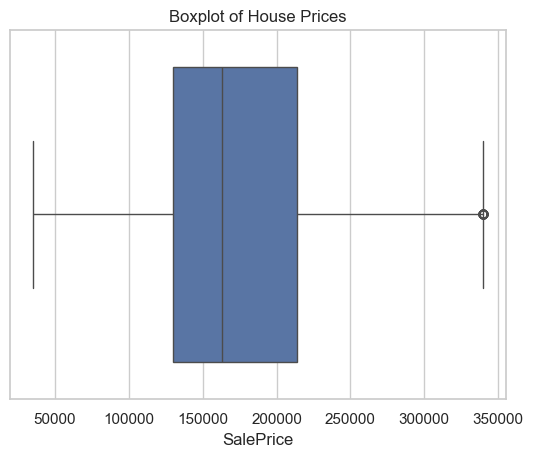

In [939]:
# Visualize outliers
print(df_outliers_handled.columns.tolist())
sns.boxplot(x=df_outliers_handled['SalePrice'])
plt.title('Boxplot of House Prices')
plt.show()

# Remove outliers using IQR
Q1 = df_outliers_handled['SalePrice'].quantile(0.25)
Q3 = df_outliers_handled['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
df_outliers_handled = df_outliers_handled[(df_outliers_handled['SalePrice'] >= Q1 - 1.5 * IQR) & (df_outliers_handled['SalePrice'] <= Q3 + 1.5 * IQR)]

## Univariate Analysis (Categorical)

We analyze the distribution of a categorical feature using a bar plot. This helps us understand the frequency of each category in the dataset.


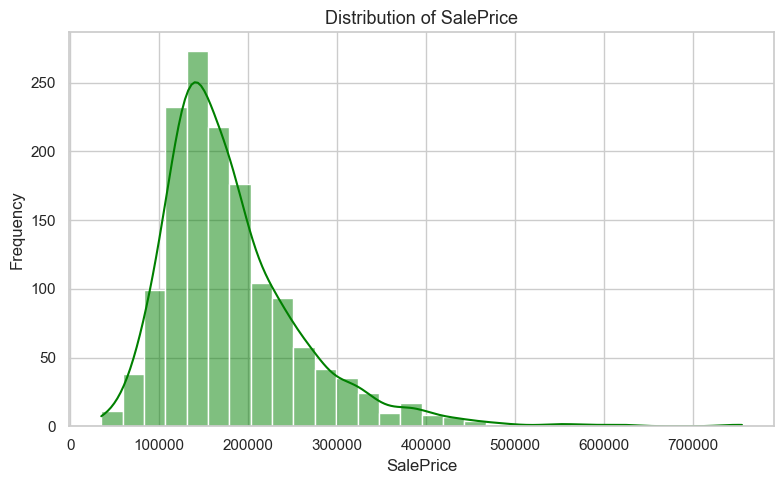

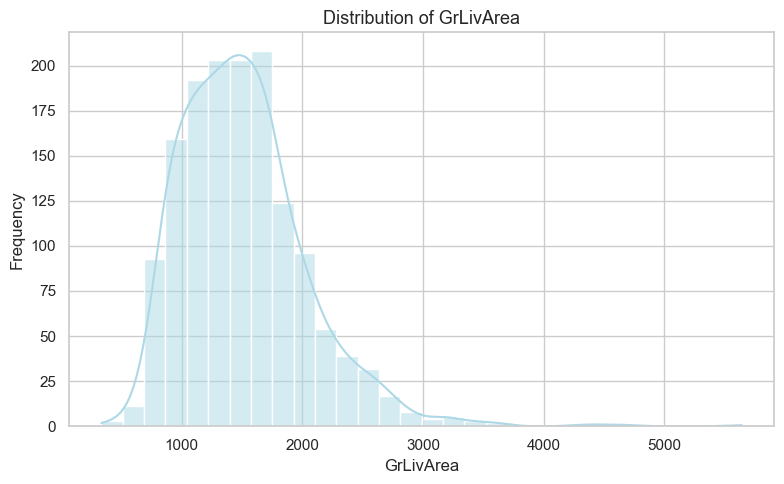

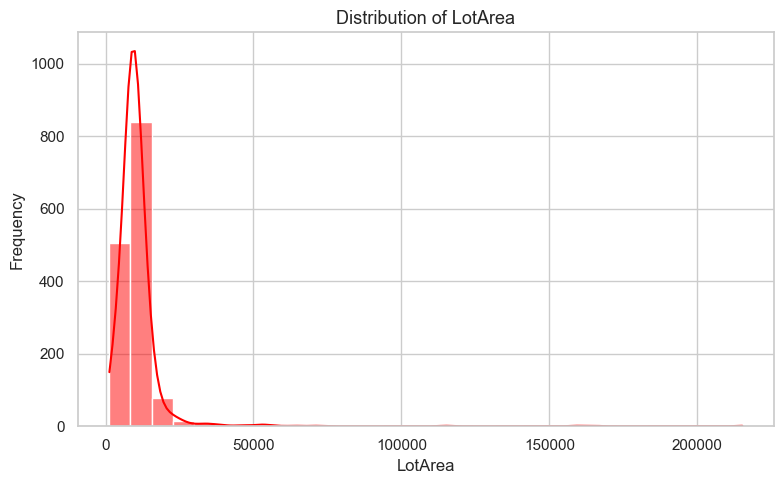

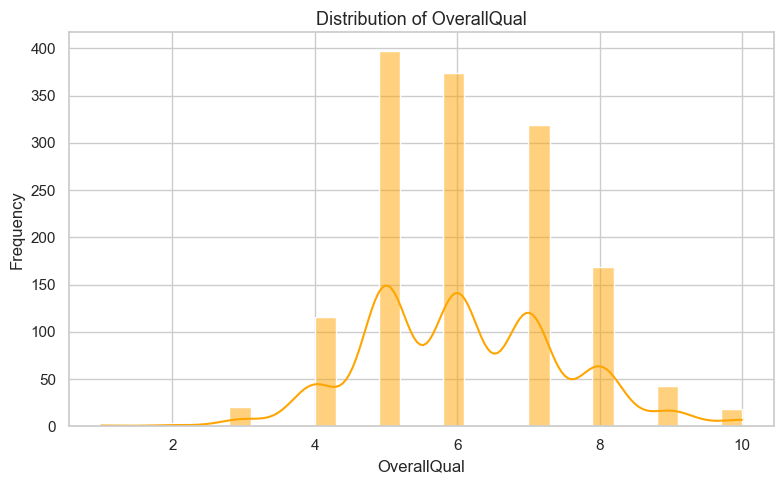

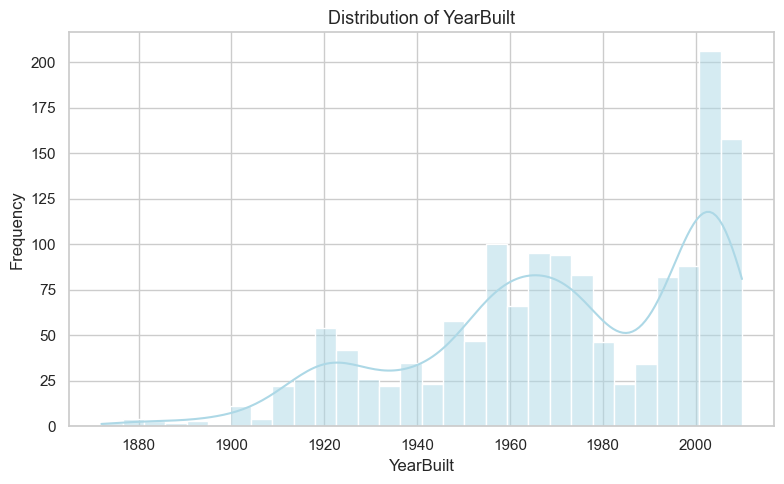

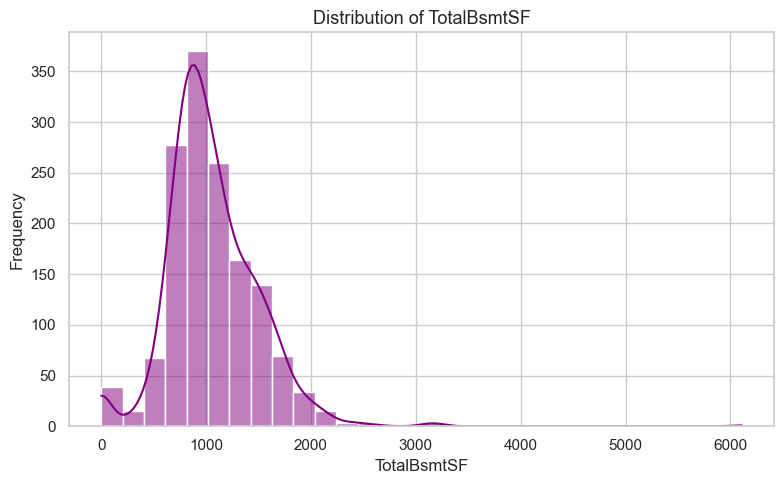

In [940]:
sns.set(style='whitegrid')

# === Selecting top numeric features ===
selected_features = ['SalePrice', 'GrLivArea', 'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF']

color_palette = ['green', 'lightblue', 'red', 'orange', 'lightblue', 'purple']

assert len(selected_features) <= len(color_palette)

# === Plot each feature with a unique color ===
for col, color in zip(selected_features, color_palette):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color=color)
    plt.title(f'Distribution of {col}', fontsize=13)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    
image_dir = housing_feature_dict.ASSETS_UNI_IMG_PATH
os.makedirs(image_dir, exist_ok=True)

# === Load dataset ===
df = pd.read_excel(output_file, sheet_name=housing_feature_dict.SHEET_HOUSING)

# === Select numeric features ===
selected_features = ['SalePrice', 'GrLivArea', 'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF']
color_palette = ['green', 'blue', 'red', 'orange', 'lightblue', 'purple']

# === Selected features and colors ===
selected_features = ['SalePrice', 'GrLivArea', 'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF']
color_palette = ['green', 'blue', 'red', 'orange', 'lightblue', 'purple']

# === Step 1: Load workbook and clean sheet ===
wb = load_workbook(output_file)

if housing_feature_dict.SHEET_UNIVARIATE in wb.sheetnames:
    wb.remove(wb[housing_feature_dict.SHEET_UNIVARIATE])

ws = wb.create_sheet(housing_feature_dict.SHEET_UNIVARIATE)

# === Step 2: Load data ===
df = pd.read_excel(output_file, sheet_name=housing_feature_dict.SHEET_HOUSING)

# === Step 3: Compute summary statistics ===
summary = []
for col in selected_features:
    stats = {
        'Feature': col,
        'Mean': round(df[col].mean(), 2),
        'Median': round(df[col].median(), 2),
        'Std Dev': round(df[col].std(), 2),
        'Skewness': round(df[col].skew(), 2),
        'Kurtosis': round(df[col].kurtosis(), 2)
    }
    summary.append(stats)

summary_df = pd.DataFrame(summary)

# === Step 4: Write summary table to sheet ===
for col_idx, col_name in enumerate(summary_df.columns, start=1):
    ws.cell(row=1, column=col_idx, value=col_name)

for row_idx, row in enumerate(summary_df.to_numpy(), start=2):
    for col_idx, value in enumerate(row, start=1):
        ws.cell(row=row_idx, column=col_idx, value=value)

# === Step 5: Generate and save plots ===
image_paths = []
for col, color in zip(selected_features, color_palette):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color=color)
    plt.title(f'Distribution of {col}', fontsize=11)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    img_path = os.path.join(image_dir, f'{col}_dist.png')
    plt.savefig(img_path, dpi=120)
    plt.close()
    image_paths.append(img_path)

# === Step 6: Embed plots below the table ===
start_row = len(summary_df) + 2
    
# === Style header row ===
header_font = Font(bold=True, color='FFFFFF')
header_fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
header_align = Alignment(horizontal='center', vertical='center')

for cell in ws[1]:
    cell.font = header_font
    cell.fill = header_fill
    cell.alignment = header_align

# === Center-align all summary cells ===
for row in ws.iter_rows(min_row=2, max_row=len(summary_df)+1, min_col=1, max_col=6):
    for cell in row:
        cell.alignment = Alignment(horizontal='center', vertical='center')

# === Embed plots with reduced spacing ===
start_row = len(summary_df) + 4

for img_path in image_paths:
    img = XLImage(img_path)
    img.width = img.width * 0.6
    img.height = img.height * 0.6
    ws.add_image(img, f'B{start_row}')
    start_row += 15  # Reduced gap between plots

# === Save workbook ===
wb.save(output_file)

# === Step 7: Save workbook ===
wb.save(output_file)

#### Continous Feature: SalePrice

Available categorical columns: ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


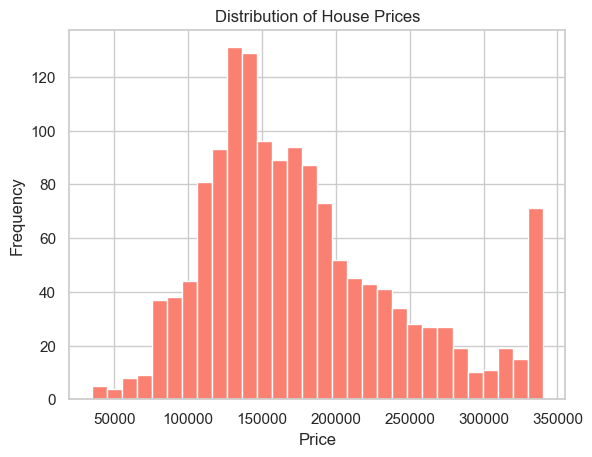

In [941]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Available categorical columns:", categorical_cols)

# Continuous Feature: SalePrice
df['SalePrice'].plot(kind='hist', bins=30, color='salmon')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis
Examines the relationship between two variables to identify patterns, trends, and potential dependencies. Common techniques include scatterplots, boxplots, and grouped bar charts.
We will use the variable pairs to do the bivariate analysis. These pairs are as follows:
01. `SalePrice` - `GrLivArea`
02. `SalePrice` - `OverallQual`
03. `SalePrice` - `YearBuilt`
04. `SalePrice` - `TotalBsmtSF`
05. `SalePrice` - `LotArea`


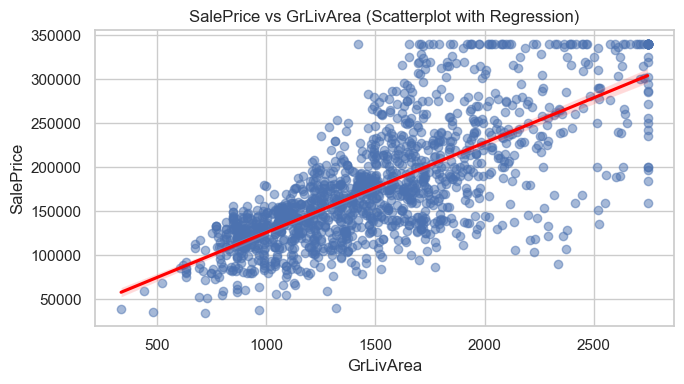

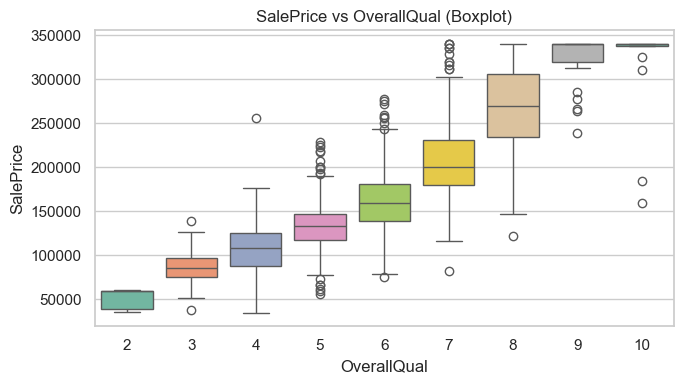

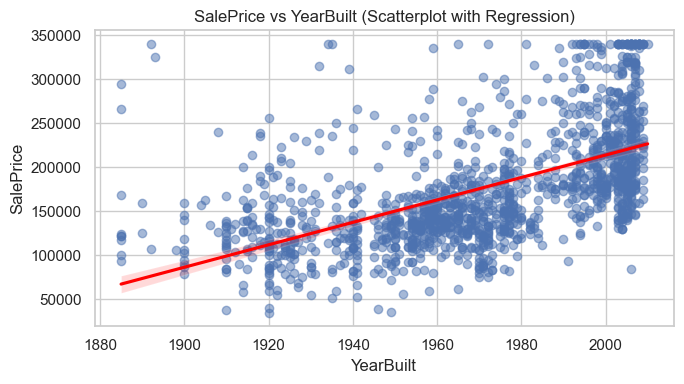

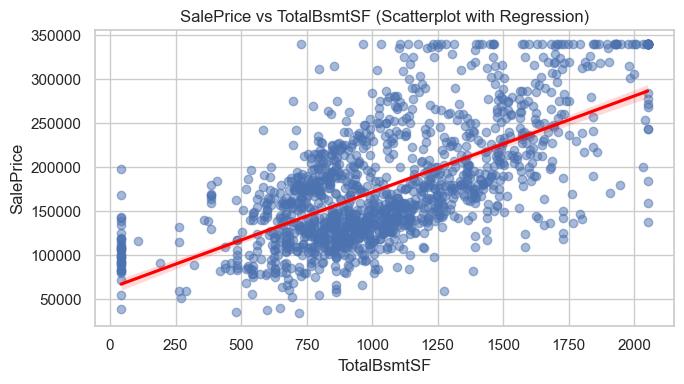

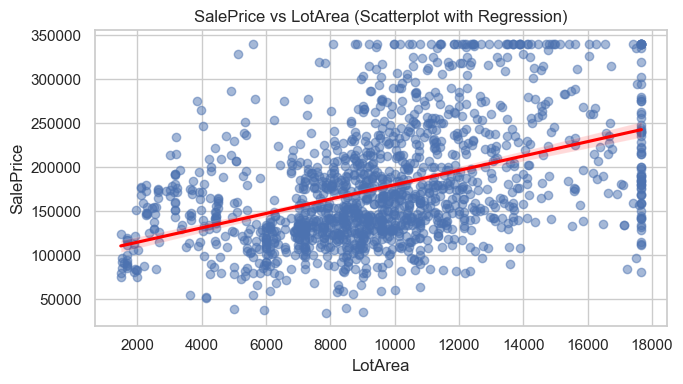

In [942]:
bi_var_dir = housing_feature_dict.ASSETS_BI_IMG_PATH
os.makedirs(bi_var_dir, exist_ok=True)
# === Load dataset ===
df = pd.read_excel(output_file, sheet_name='Housing Data')

# === Variable pairs for bivariate analysis ===
pairs = [
    ('SalePrice', 'GrLivArea'),
    ('SalePrice', 'OverallQual'),
    ('SalePrice', 'YearBuilt'),
    ('SalePrice', 'TotalBsmtSF'),
    ('SalePrice', 'LotArea')
]

# === Step 1: Load workbook and preserve all sheets ===
wb = load_workbook(output_file)
sheetnames = wb.sheetnames

# Remove only 'Bivariate Analysis' if it exists
if housing_feature_dict.BIVARIATE_ANALYSIS in sheetnames:
    bivar_sheet = wb[housing_feature_dict.BIVARIATE_ANALYSIS]
    wb.remove(bivar_sheet)

# Create new sheet
ws = wb.create_sheet(housing_feature_dict.BIVARIATE_ANALYSIS)

# === Step 2: Insert Markdown Header ===
ws['B2'] = (housing_feature_dict.BIVARIATE_ANALYSIS)
ws.merge_cells('B2:H2')
ws['B2'].font = Font(bold=True, color='FFFFFF')
ws['B2'].fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
ws['B2'].alignment = Alignment(horizontal='center', vertical='center')

# === Step 3: Generate and show plots ===
image_paths = []
for x, y in pairs:
    plt.figure(figsize=(7, 4))
    if y == 'OverallQual':
        sns.boxplot(x=df[y], y=df[x], hue=df[y], palette='Set2', legend=False)
        plt.title(f'{x} vs {y} (Boxplot)', fontsize=12)
    else:
        sns.regplot(x=df[y], y=df[x], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
        plt.title(f'{x} vs {y} (Scatterplot with Regression)', fontsize=12)
    plt.xlabel(y)
    plt.ylabel(x)
    plt.tight_layout()
    img_path = os.path.join(bi_var_dir, f'{x}_vs_{y}.png')
    plt.savefig(img_path, dpi=120)
    plt.show()
    image_paths.append(img_path)
    plt.close()

# === Step 4: Embed plots into Excel with spacing ===
start_row = 4
for img_path in image_paths:
    img = XLImage(img_path)
    img.width *= 0.6
    img.height *= 0.6
    ws.add_image(img, f'B{start_row}')
    start_row += int(img.height / 20) + 3  # Add 2–3 row gap

# === Step 5: Save workbook ===
wb.save(output_file)

## Multivariate Analysis

We use:
- Pair plots to visualize interactions among multiple numerical features.
- Heatmaps to detect strong correlations (e.g., `Area_sqft` and `Price`).


Correlation Matrix:
               UnitId  LotFrontage  LotArea  OverallQual  OverallCond  \
UnitId           1.00        -0.02    -0.03        -0.03         0.01   
LotFrontage     -0.02         1.00     0.10         0.18        -0.05   
LotArea         -0.03         0.10     1.00         0.11        -0.01   
OverallQual     -0.03         0.18     0.11         1.00        -0.09   
OverallCond      0.01        -0.05    -0.01        -0.09         1.00   
YearBuilt       -0.01         0.04     0.01         0.57        -0.38   
YearRemodAdd    -0.02         0.08     0.01         0.55         0.07   
MasVnrArea      -0.05         0.11     0.10         0.41        -0.13   
BsmtFinSF1      -0.01         0.08     0.21         0.24        -0.05   
BsmtFinSF2      -0.01        -0.01     0.11        -0.06         0.04   
BsmtUnfSF       -0.01         0.16    -0.00         0.31        -0.14   
TotalBsmtSF     -0.02         0.24     0.26         0.54        -0.17   
1stFlrSF         0.01         0

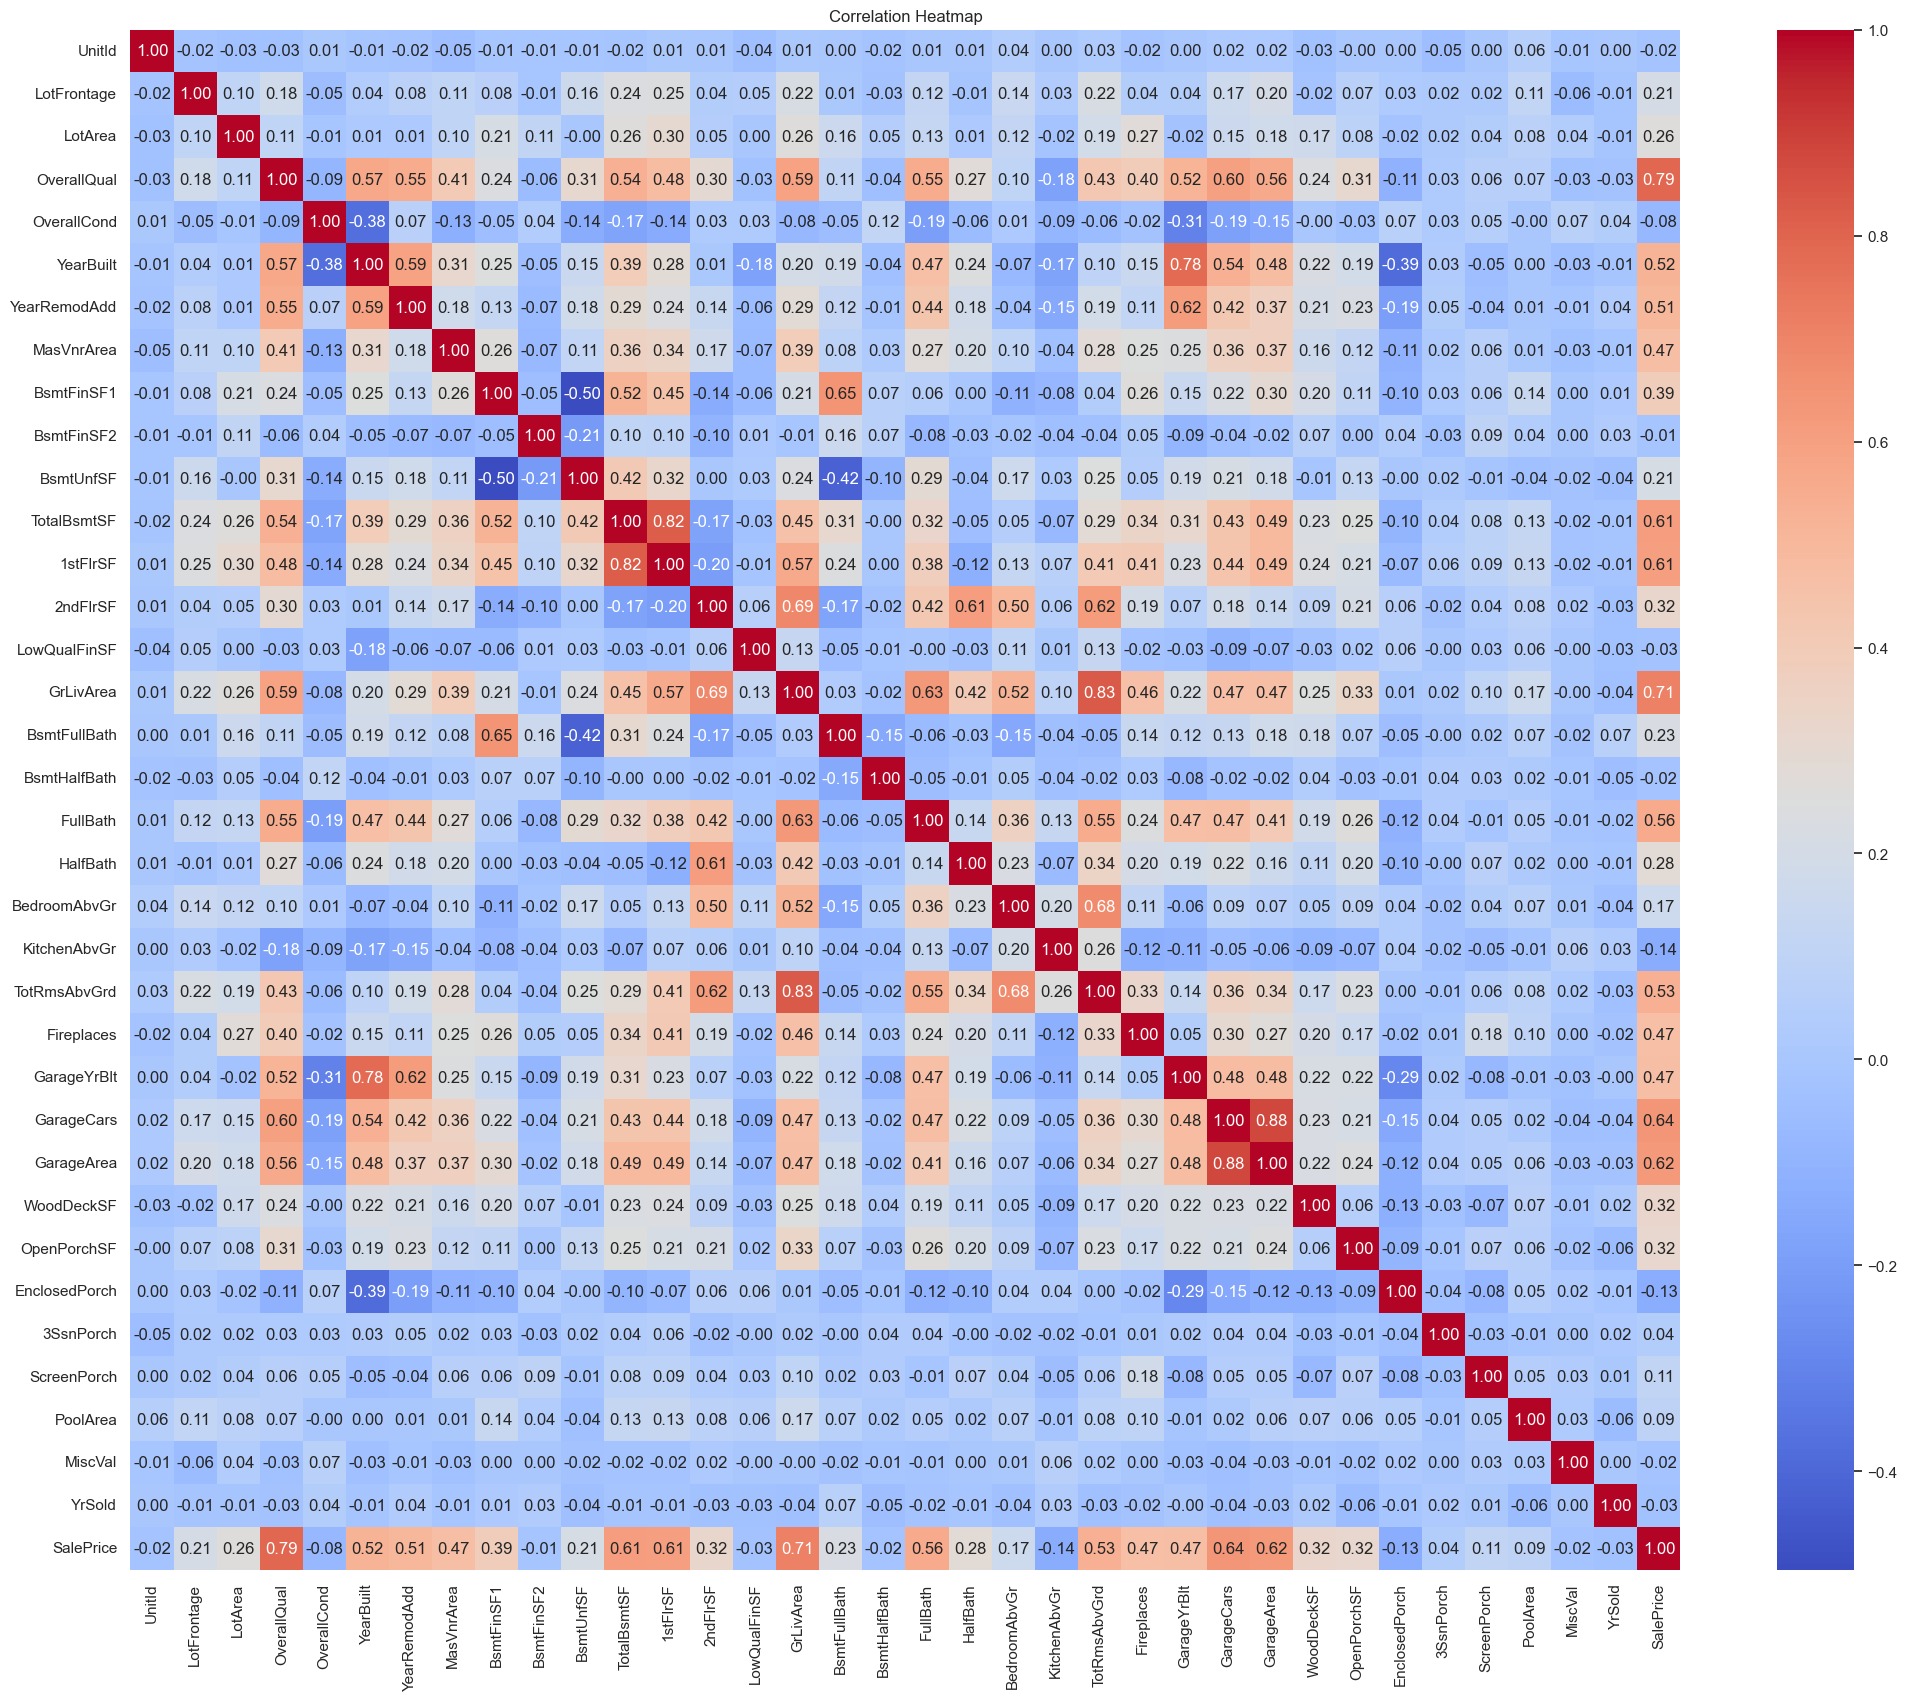

<Figure size 3000x3000 with 0 Axes>

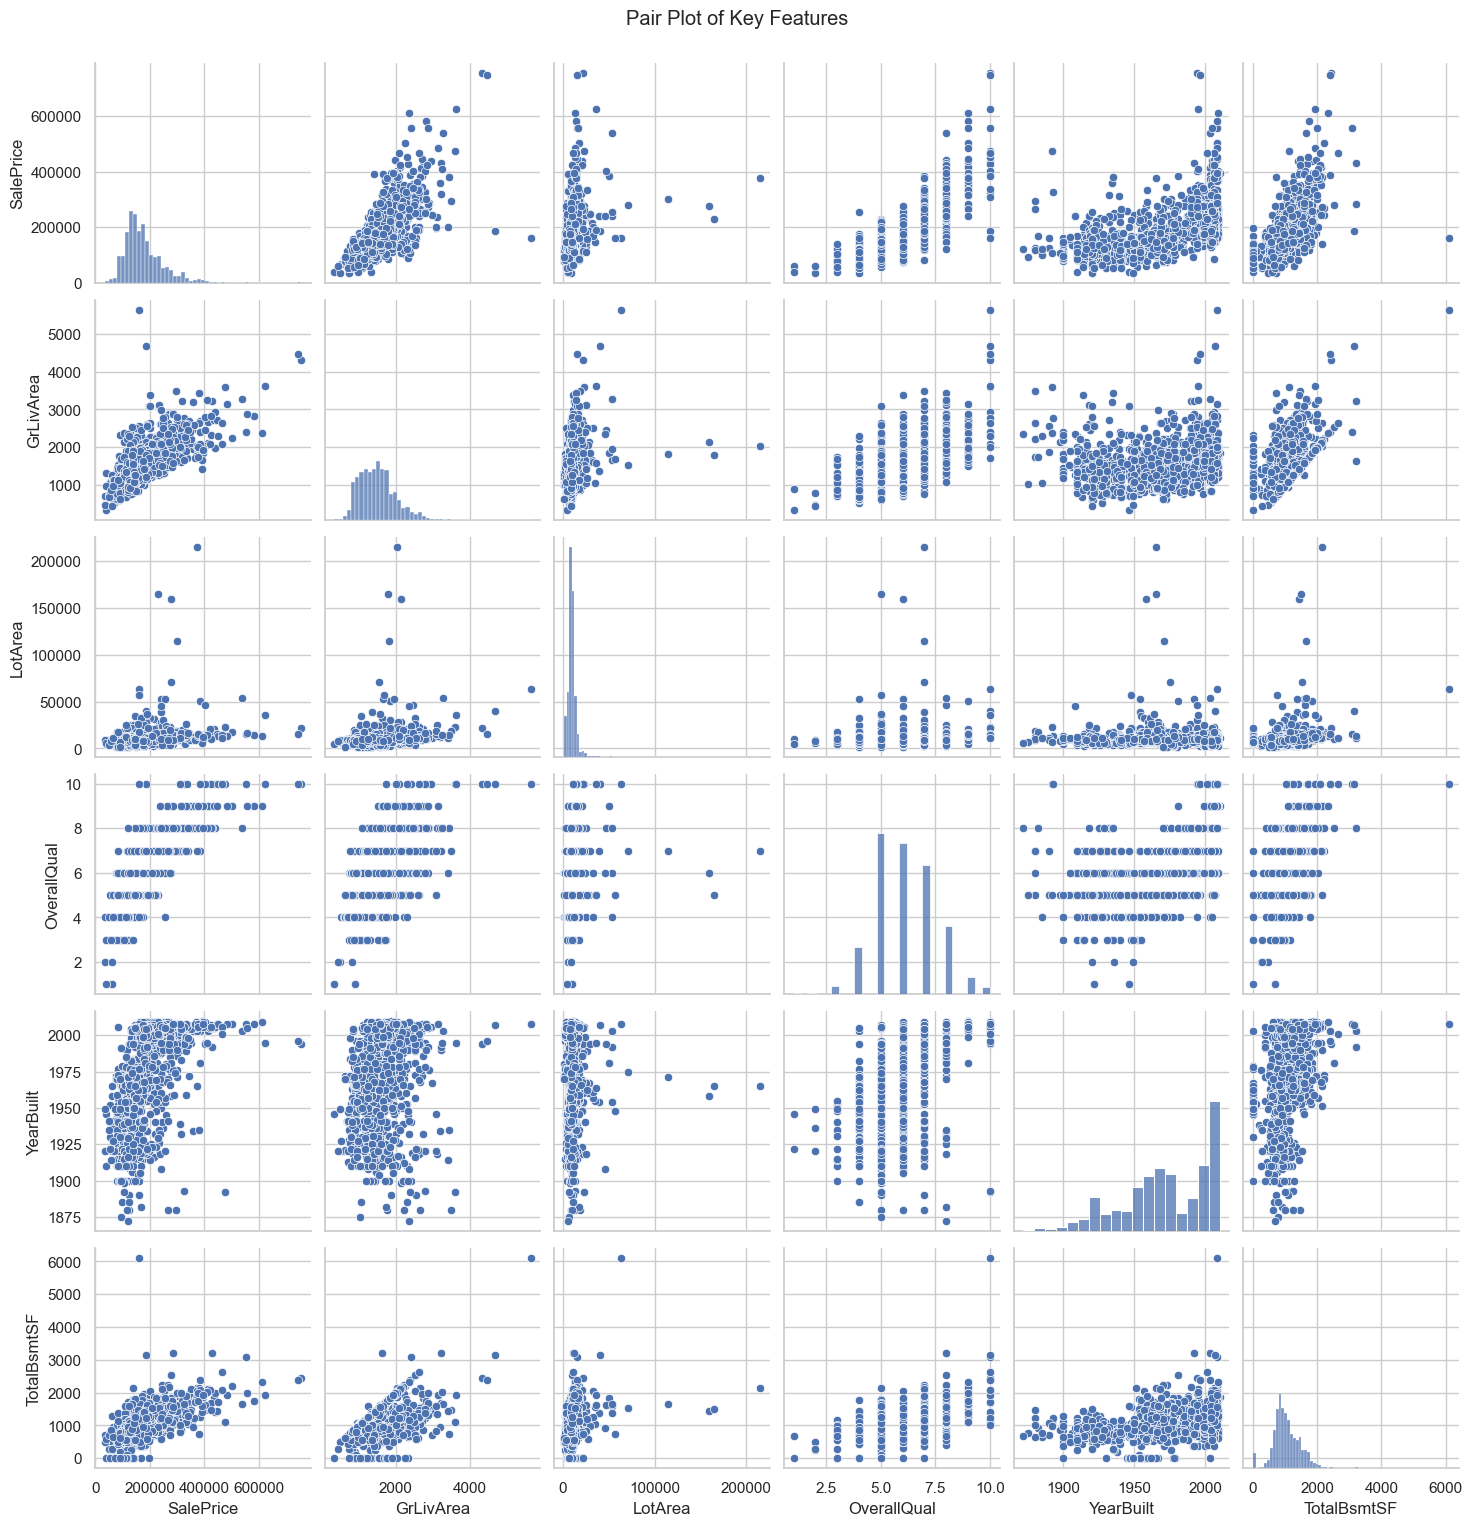

In [943]:
# Correlation heatmap
# Select only numeric columns
# === Load dataset ===
multi_var_dir = housing_feature_dict.ASSETS_MUL_IMG_PATH
os.makedirs(multi_var_dir, exist_ok=True)
numeric_df = df_cleaned.select_dtypes(include='number')
selected_features = ['SalePrice', 'GrLivArea', 'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF']

# === Step 1: Display correlation matrix in notebook ===
print("Correlation Matrix:")
print(numeric_df.corr().round(2))

# === Step 2: Plot and show heatmap ===
plt.figure(figsize=(25, 20))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
heatmap_path = os.path.join(multi_var_dir, housing_feature_dict.HEATMAP_IMG)
plt.savefig(heatmap_path, dpi=120)
plt.show()

# === Step 3: Plot and show pairplot ===
plt.figure(figsize=(30, 30))
pairplot = sns.pairplot(df_cleaned[selected_features])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

scatterplot_path = os.path.join(multi_var_dir, housing_feature_dict.PAIR_PLOT_IMG)
pairplot.savefig(scatterplot_path, dpi=120)
plt.show()

# === Step 4: Clean/Create 'Multivariate Analysis' sheet ===
wb = load_workbook(output_file)
if housing_feature_dict.SHEET_MULTIVARIATE in wb.sheetnames:
    wb.remove(wb[housing_feature_dict.SHEET_MULTIVARIATE])
ws = wb.create_sheet(housing_feature_dict.SHEET_MULTIVARIATE)

# === Step 5: Write correlation matrix to Excel ===
corr_matrix = numeric_df.corr().round(2)
ws['B2'] = housing_feature_dict.MULTIVARIATE_ANALYSIS_HEADER
ws.merge_cells('A1:I2')
ws['B2'].font = Font(bold=True, color='FFFFFF')
ws['B2'].fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
ws['B2'].alignment = Alignment(horizontal='center')

# Define styles
center_alignment = Alignment(horizontal='center', vertical='center')
thin_border = Border(
    left=Side(style='thin', color='000000'),
    right=Side(style='thin', color='000000'),
    top=Side(style='thin', color='000000'),
    bottom=Side(style='thin', color='000000')
)

header_fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
first_col_fill = PatternFill(start_color='3A8E9E', end_color='3A8E9E', fill_type='solid')

# Header row
for col_idx, col_name in enumerate(corr_matrix.columns, start=2):
    cell = ws.cell(row=3, column=col_idx, value=col_name)
    cell.font = Font(bold=True, color='FFFFFF')
    cell.fill = header_fill
    cell.alignment = center_alignment
    cell.border = thin_border

# Data rows
for row_idx, row_name in enumerate(corr_matrix.index, start=4):
    row_cell = ws.cell(row=row_idx, column=1, value=row_name)
    row_cell.font = Font(color='FFFFFF')
    row_cell.fill = first_col_fill
    row_cell.alignment = center_alignment
    row_cell.border = thin_border
    for col_idx, value in enumerate(corr_matrix.iloc[row_idx - 4], start=2):
        cell = ws.cell(row=row_idx, column=col_idx, value=value)
        cell.alignment = center_alignment
        cell.border = thin_border

# === Step 6: Insert images ===
start_row = len(corr_matrix) + 4  # Leave a row gap after the table
for img_path in [heatmap_path, scatterplot_path]:
    img = XLImage(img_path)
    img.width *= 0.6
    img.height *= 0.6
    ws.add_image(img, f'B{start_row}')
    start_row += int(img.height / 20) + 3  # Add 2–3 row gap

# === Save workbook ===
wb.save(output_file)

### Feature Engineering
Introduces new variables that might enhance the model's ability to predict house prices. For instance, calculate the price per square foot or engineer a feature representing the property's age.
We will get the following things:
01. `Price per square feet`
02. `Property Age`
03. `SalePrice Vs TotalLivingArea`

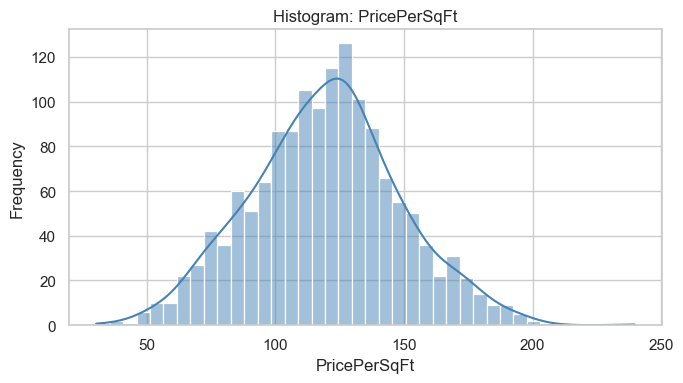

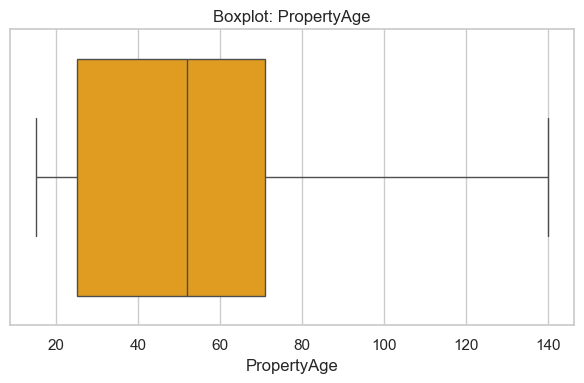

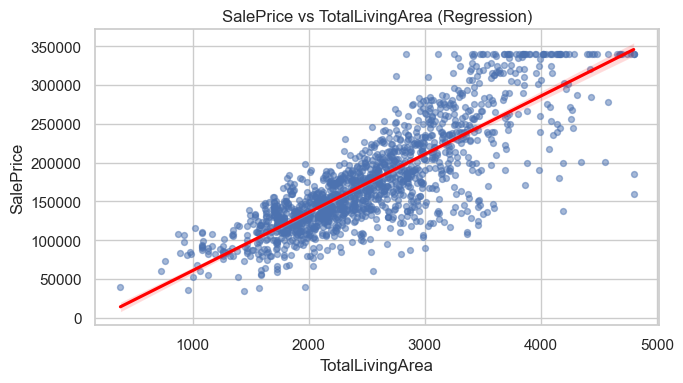

Feature Engineering complete. Images saved to: d:\Projects\DSC\NextHikes\Python\hda-pro-3\housing-data-analysis-pro-3\assets\images\feature_engineering
Excel updated with sheet: 'Feature Engineering' without altering other sheets.


In [944]:
# === Configuration ===
CURRENT_YEAR = 2025
os.makedirs(housing_feature_dict.ASSETS_FE_IMG_PATH, exist_ok=True)

# === Load dataset ===
required_cols = ['SalePrice', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF']
df = pd.read_excel(output_file, sheet_name=housing_feature_dict.SHEET_HOUSING)

missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns in '{housing_feature_dict.SHEET_HOUSING}': {missing}")

# === Engineer new features ===
# 1) Price per square foot, guard against division-by-zero or NaN
den = df['GrLivArea'].replace(0, np.nan)
df['PricePerSqFt'] = df['SalePrice'] / den
df['PricePerSqFt'] = df['PricePerSqFt'].replace([np.inf, -np.inf], np.nan)

# 2) Property age, clamp to >= 0 and handle NaNs
df['PropertyAge'] = (CURRENT_YEAR - df['YearBuilt']).clip(lower=0)

# 3) Total living area: above grade + basement
df['TotalLivingArea'] = df['GrLivArea'].fillna(0) + df['TotalBsmtSF'].fillna(0)

# === Summary statistics for engineered features ===
features = ['PricePerSqFt', 'PropertyAge', 'TotalLivingArea']
summary_df = pd.DataFrame({
    'Feature': features,
    'Mean': [round(df[f].mean(skipna=True), 2) for f in features],
    'Median': [round(df[f].median(skipna=True), 2) for f in features],
    'Std Dev': [round(df[f].std(skipna=True), 2) for f in features],
    'Non-Null Count': [int(df[f].notna().sum()) for f in features]
})

# === Plots: show in notebook and save images ===
# 1) Histogram: PricePerSqFt
plt.figure(figsize=(7, 4))
sns.histplot(df['PricePerSqFt'], bins=40, kde=True, color='steelblue')
plt.title('Histogram: PricePerSqFt', fontsize=12)
plt.xlabel('PricePerSqFt')
plt.ylabel('Frequency')
price_sqft_path = os.path.join(housing_feature_dict.ASSETS_FE_IMG_PATH, 'hist_price_per_sqft.png')
plt.tight_layout()
plt.savefig(price_sqft_path, dpi=130)
plt.show()
plt.close()

# 2) Boxplot: PropertyAge (single-variable boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['PropertyAge'], color='orange')
plt.title('Boxplot: PropertyAge', fontsize=12)
plt.xlabel('PropertyAge')
prop_age_path = os.path.join(housing_feature_dict.ASSETS_FE_IMG_PATH, 'box_property_age.png')
plt.tight_layout()
plt.savefig(prop_age_path, dpi=130)
plt.show()
plt.close()

# 3) Scatter with regression: SalePrice vs TotalLivingArea
plt.figure(figsize=(7, 4))
sns.regplot(x=df['TotalLivingArea'], y=df['SalePrice'],
            scatter_kws={'alpha': 0.5, 's': 18}, line_kws={'color': 'red'})
plt.title('SalePrice vs TotalLivingArea (Regression)', fontsize=12)
plt.xlabel('TotalLivingArea')
plt.ylabel('SalePrice')
sale_vs_tla_path = os.path.join(housing_feature_dict.ASSETS_FE_IMG_PATH, 'scatter_saleprice_total_living_area.png')
plt.tight_layout()
plt.savefig(sale_vs_tla_path, dpi=130)
plt.show()
plt.close()

# === Write to Excel: create/update Feature Engineering sheet ===
wb = load_workbook(output_file)

# Remove only the Feature Engineering sheet if it exists; preserve others
if housing_feature_dict.SHEET_FEATURE_ENGG in wb.sheetnames:
    ws_old = wb[housing_feature_dict.SHEET_FEATURE_ENGG]
    wb.remove(ws_old)

ws = wb.create_sheet(housing_feature_dict.SHEET_FEATURE_ENGG)

# --- Markdown-style header at top ---
header_text = ("Feature Engineering: Introduces new variables that might enhance the model's ability "
               "to predict house prices.")
ws['B2'] = header_text
ws.merge_cells('B2:H3')
ws['B2'].font = Font(bold=True, color='FFFFFF')
ws['B2'].fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
ws['B2'].alignment = Alignment(horizontal='center', vertical='center')

# --- Summary table ---
start_row_table = 5
headers = list(summary_df.columns)

# Write headers
for col_idx, col_name in enumerate(headers, start=2):
    c = ws.cell(row=start_row_table, column=col_idx, value=col_name)
    c.font = Font(bold=True, color='FFFFFF')
    c.fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
    c.alignment = Alignment(horizontal='center', vertical='center')

# Write rows
for r_i, row in enumerate(summary_df.itertuples(index=False), start=start_row_table + 1):
    for c_i, val in enumerate(row, start=2):
        cell = ws.cell(row=r_i, column=c_i, value=val)
        cell.alignment = Alignment(horizontal='center', vertical='center')

# Optional: auto-width for the table columns
for i in range(2, 2 + len(headers)):
    col_letter = get_column_letter(i)
    ws.column_dimensions[col_letter].width = 18

# --- Embed images with clean spacing (vertical stacking, 2–3 row gap) ---
image_paths = [price_sqft_path, prop_age_path, sale_vs_tla_path]
start_row_images = start_row_table + len(summary_df) + 3  # below table

for img_path in image_paths:
    img = XLImage(img_path)
    # Scale down if required (tweak to your sheet layout)
    img.width = int(img.width * 0.6)
    img.height = int(img.height * 0.6)
    ws.add_image(img, f'B{start_row_images}')
    # Add ~2–3 row gap after each image; adjust based on height
    start_row_images += int(img.height / 18) + 3

# === Save workbook ===
wb.save(output_file)

print(f"Feature Engineering complete. Images saved to: {housing_feature_dict.ASSETS_FE_IMG_PATH}")
print(f"Excel updated with sheet: '{housing_feature_dict.SHEET_FEATURE_ENGG}' without altering other sheets.")

## Market Trends and Historical Pricing
We will analyze the dataset temporally, looking at trends in house prices over different periods. We will also understand how external factors, such as economic indicators, may have influenced these trends. 

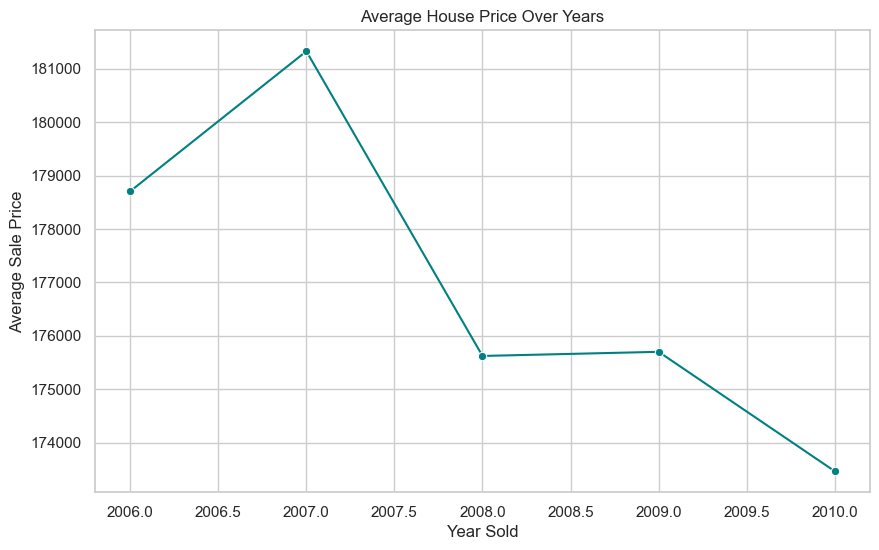

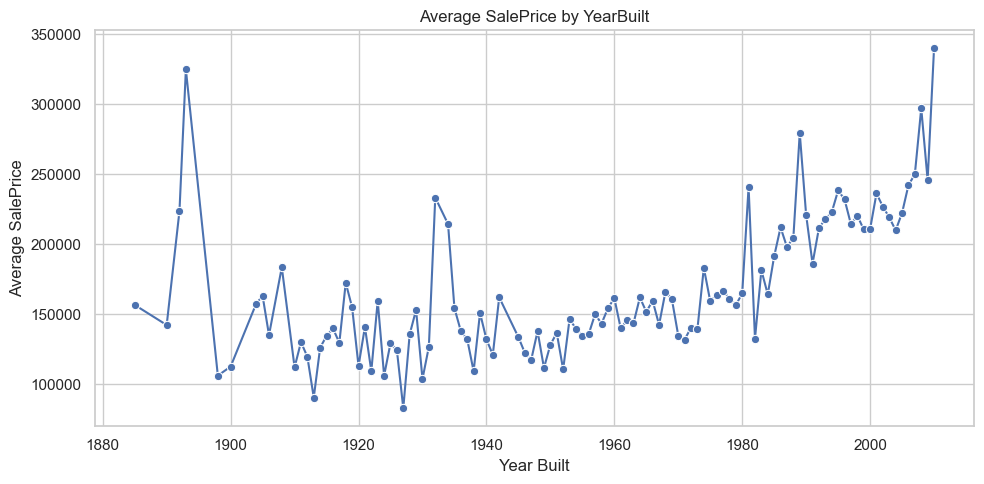

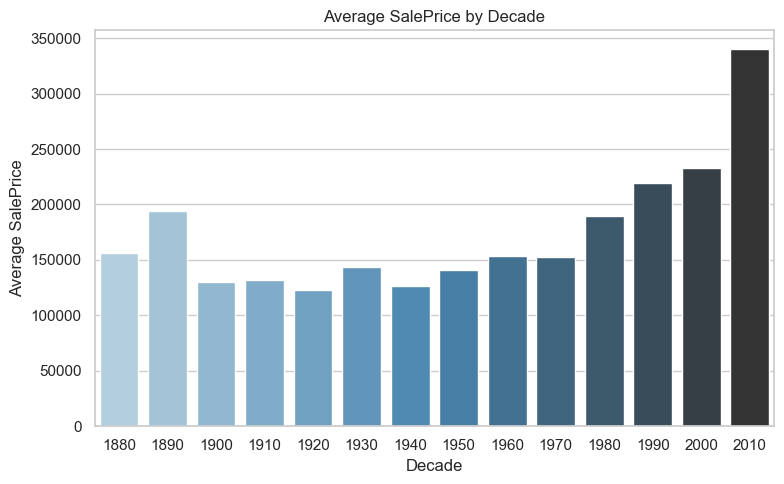

Market Trends and Historical Pricing analysis complete. Images saved to: d:\Projects\DSC\NextHikes\Python\hda-pro-3\housing-data-analysis-pro-3\assets\images\market_trends
d:\Projects\DSC\NextHikes\Python\hda-pro-3\housing-data-analysis-pro-3\data\housing_data.xlsx updated with sheet: 'Market Trends'


In [945]:
os.makedirs(housing_feature_dict.MT_IMG_DIR, exist_ok=True)

# === Load dataset ===
df = pd.read_excel(output_file, sheet_name=housing_feature_dict.SHEET_HOUSING)

# Ensure required columns exist
if 'SalePrice' not in df.columns or 'YearBuilt' not in df.columns:
    raise ValueError("Dataset must contain 'SalePrice' and 'YearBuilt' columns.")

# === Step 1: Temporal aggregations ===

# Average SalePrice by YearBuilt
yearly_trend = df.groupby('YearBuilt')['SalePrice'].mean().reset_index()
price_by_year = df.groupby('YrSold')['SalePrice'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='YrSold', y='SalePrice', data=price_by_year, marker='o', color='teal')
plt.title('Average House Price Over Years')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.show()

# Average SalePrice by Decade
df['Decade'] = (df['YearBuilt'] // 10) * 10
decade_trend = df.groupby('Decade')['SalePrice'].mean().reset_index()

# === Step 2: Plots (Notebook + Save) ===
# 1) Lineplot: Average SalePrice by YearBuilt
plt.figure(figsize=(10, 5))
sns.lineplot(x='YearBuilt', y='SalePrice', data=yearly_trend, marker='o')
plt.title('Average SalePrice by YearBuilt')
plt.xlabel('Year Built')
plt.ylabel('Average SalePrice')
plt.tight_layout()
yearly_path = os.path.join(housing_feature_dict.MT_IMG_DIR, 'avg_price_by_year.png')
plt.savefig(yearly_path, dpi=130)
plt.show()
plt.close()

# 2) Barplot: Average SalePrice by Decade
plt.figure(figsize=(8, 5))
sns.barplot(x='Decade', y='SalePrice', data=decade_trend, hue='Decade', palette='Blues_d', legend=False)
plt.title('Average SalePrice by Decade')
plt.xlabel('Decade')
plt.ylabel('Average SalePrice')
plt.tight_layout()
decade_path = os.path.join(housing_feature_dict.MT_IMG_DIR, 'avg_price_by_decade.png')
plt.savefig(decade_path, dpi=130)
plt.show()
plt.close()

# === Step 3: Write to Excel ===
wb = load_workbook(output_file)

# Remove only this sheet if it exists
if housing_feature_dict.SHEET_MARKET_TRENDS in wb.sheetnames:
    ws_old = wb[housing_feature_dict.SHEET_MARKET_TRENDS]
    wb.remove(ws_old)

ws = wb.create_sheet(housing_feature_dict.SHEET_MARKET_TRENDS)

# --- Markdown-style header ---
header_text = ("Market Trends and Historical Pricing: Analyze the dataset temporally, "
               "looking at trends in house prices over different periods. Understand how "
               "external factors, such as economic indicators, may have influenced these trends.")
ws['B2'] = header_text
ws.merge_cells('B2:H3')
ws['B2'].font = Font(bold=True, color='FFFFFF')
ws['B2'].fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
ws['B2'].alignment = Alignment(horizontal='center', vertical='center')

# --- Insert summary tables ---
# Yearly trend table
start_row = 5
ws.cell(row=start_row, column=2, value='YearBuilt')
ws.cell(row=start_row, column=3, value='Avg SalePrice')
ws.cell(row=start_row, column=2).font = Font(bold=True, color='FFFFFF')
ws.cell(row=start_row, column=3).font = Font(bold=True, color='FFFFFF')
ws.cell(row=start_row, column=2).fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
ws.cell(row=start_row, column=3).fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')

for i, row in enumerate(yearly_trend.itertuples(index=False), start=start_row+1):
    ws.cell(row=i, column=2, value=row.YearBuilt)
    ws.cell(row=i, column=3, value=round(row.SalePrice, 2))

# Decade trend table
start_row = start_row + len(yearly_trend) + 3
ws.cell(row=start_row, column=2, value='Decade')
ws.cell(row=start_row, column=3, value='Avg SalePrice')
ws.cell(row=start_row, column=2).font = Font(bold=True, color='FFFFFF')
ws.cell(row=start_row, column=3).font = Font(bold=True, color='FFFFFF')
ws.cell(row=start_row, column=2).fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
ws.cell(row=start_row, column=3).fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')

for i, row in enumerate(decade_trend.itertuples(index=False), start=start_row+1):
    ws.cell(row=i, column=2, value=row.Decade)
    ws.cell(row=i, column=3, value=round(row.SalePrice, 2))

# --- Embed plots with spacing ---
img_paths = [yearly_path, decade_path]
start_row_img = start_row + len(decade_trend) + 4

for img_path in img_paths:
    img = XLImage(img_path)
    img.width = int(img.width * 0.6)
    img.height = int(img.height * 0.6)
    ws.add_image(img, f'B{start_row_img}')
    start_row_img += int(img.height / 20) + 3

# === Save workbook ===
wb.save(output_file)

print(f"Market Trends and Historical Pricing analysis complete. Images saved to: {housing_feature_dict.MT_IMG_DIR}")
print(f"{housing_feature_dict.XLSX_PATH} updated with sheet: '{housing_feature_dict.SHEET_MARKET_TRENDS}'")

## Customer Preferences and Amenities Analysis
We’ll examine the dataset to see how the presence or absence of certain amenities affects average house prices. This will be visualized with boxplots and barplots. If customer feedback/reviews were available, we’d integrate sentiment analysis, but since the Ames Housing dataset (or similar) doesn’t include reviews, we’ll focus on structural amenities.

### Amenities to Analyze
`PoolArea (Swimming pool size; >0 means pool present)`

`GarageCars (Number of garage spaces)`

`Fireplaces (Number of fireplaces)`

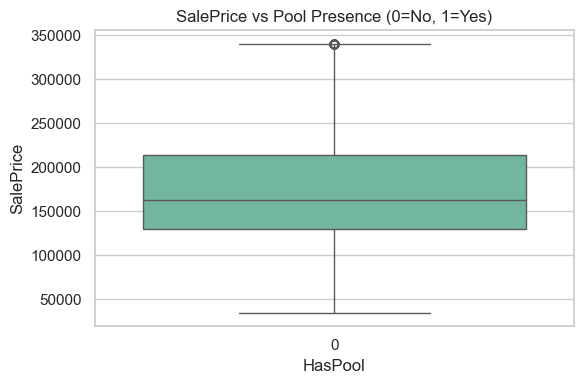

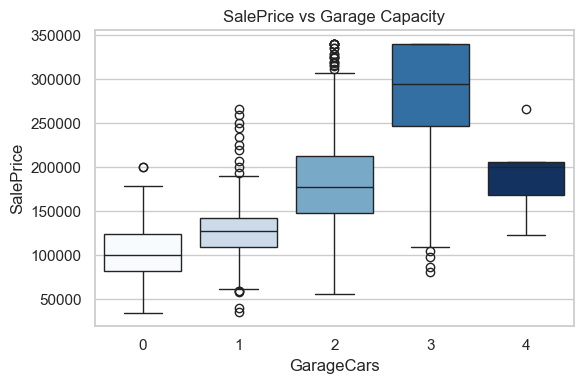

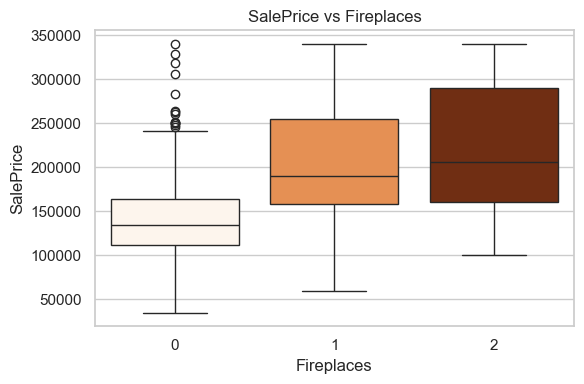

Customer Preferences and Amenities analysis complete. Images saved to: d:\Projects\DSC\NextHikes\Python\hda-pro-3\housing-data-analysis-pro-3\assets\images\customer_prefs
Excel updated with sheet: 'Customer Preferences' without altering other sheets.


In [946]:
# === Setup ===
cp_img_dir = housing_feature_dict.CP_IMG_DIR
os.makedirs(cp_img_dir, exist_ok=True)

# === Load dataset ===
df = pd.read_excel(output_file, sheet_name=housing_feature_dict.SHEET_HOUSING)

# === Engineer amenity flags ===
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['HasGarage'] = df['GarageCars'].apply(lambda x: 1 if x > 0 else 0)
df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# === Summary statistics ===
summary = {
    'Amenity': ['Pool', 'Garage', 'Fireplace'],
    'AvgPrice_With': [
        df.loc[df['HasPool']==1, 'SalePrice'].mean(),
        df.loc[df['HasGarage']==1, 'SalePrice'].mean(),
        df.loc[df['HasFireplace']==1, 'SalePrice'].mean()
    ],
    'AvgPrice_Without': [
        df.loc[df['HasPool']==0, 'SalePrice'].mean(),
        df.loc[df['HasGarage']==0, 'SalePrice'].mean(),
        df.loc[df['HasFireplace']==0, 'SalePrice'].mean()
    ]
}
summary_df = pd.DataFrame(summary).round(2)

# === Plots (Notebook + Save) ===
image_paths = []

# 1) Pool vs SalePrice
plt.figure(figsize=(6,4))
sns.boxplot(x='HasPool', y='SalePrice', data=df, hue='HasPool', palette='Set2', legend=False)
plt.title('SalePrice vs Pool Presence (0=No, 1=Yes)')
pool_path = os.path.join(cp_img_dir, 'pool_vs_price.png')
plt.tight_layout(); plt.savefig(pool_path, dpi=130); plt.show(); plt.close()
image_paths.append(pool_path)

# 2) GarageCars vs SalePrice
plt.figure(figsize=(6,4))
sns.boxplot(x='GarageCars', y='SalePrice', data=df, hue='GarageCars', palette='Blues', legend=False)
plt.title('SalePrice vs Garage Capacity')
garage_path = os.path.join(cp_img_dir, 'garage_vs_price.png')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
plt.tight_layout(); plt.savefig(garage_path, dpi=130); plt.show(); plt.close()
image_paths.append(garage_path)

# 3) Fireplaces vs SalePrice
plt.figure(figsize=(6,4))
sns.boxplot(x='Fireplaces', y='SalePrice', data=df, hue='Fireplaces', palette='Oranges', legend=False)
plt.title('SalePrice vs Fireplaces')
fireplace_path = os.path.join(cp_img_dir, 'fireplace_vs_price.png')
plt.tight_layout(); plt.savefig(fireplace_path, dpi=130); plt.show(); plt.close()
image_paths.append(fireplace_path)

# === Write to Excel ===
wb = load_workbook(output_file)

# Remove only this sheet if it exists
if housing_feature_dict.SHEET_CUSTOMER_PREFSS in wb.sheetnames:
    ws_old = wb[housing_feature_dict.SHEET_CUSTOMER_PREFSS]
    wb.remove(ws_old)

ws = wb.create_sheet(housing_feature_dict.SHEET_CUSTOMER_PREFSS)

# --- Markdown-style header ---
header_text = ("Customer Preferences and Amenities: Investigates how customer preferences "
               "and amenities impact house prices. Examines features such as swimming pools, "
               "garages, and fireplaces to understand their contribution to property value.")
ws['B2'] = header_text
ws.merge_cells('B2:H3')
ws['B2'].font = Font(bold=True, color='FFFFFF')
ws['B2'].fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
ws['B2'].alignment = Alignment(horizontal='center', vertical='center')

# --- Insert summary table ---
start_row = 5
for col_idx, col_name in enumerate(summary_df.columns, start=2):
    c = ws.cell(row=start_row, column=col_idx, value=col_name)
    c.font = Font(bold=True, color='FFFFFF')
    c.fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
    c.alignment = Alignment(horizontal='center', vertical='center')

for r_i, row in enumerate(summary_df.itertuples(index=False), start=start_row+1):
    for c_i, val in enumerate(row, start=2):
        ws.cell(row=r_i, column=c_i, value=val)

# --- Embed plots with spacing ---
start_row_img = start_row + len(summary_df) + 3
for img_path in image_paths:
    img = XLImage(img_path)
    img.width = int(img.width * 0.6)
    img.height = int(img.height * 0.6)
    ws.add_image(img, f'B{start_row_img}')
    start_row_img += int(img.height / 20) + 3

# === Save workbook ===
wb.save(output_file)

print(f"Customer Preferences and Amenities analysis complete. Images saved to: {cp_img_dir}")
print(f"Excel updated with sheet: '{housing_feature_dict.SHEET_CUSTOMER_PREFSS}' without altering other sheets.")

In [947]:

try:
    writer.close()
    print("All sheets written successfully. Excel file saved.")
except Exception as e:
    print("Warning: Some sheets might not have been saved properly:", e)


## SQL Connection

In [948]:
import sqlalchemy as sa
server = r'LAPTOP-MTOQ1ROV\SQLEXPRESS' # The name of your server
database = "HousingDB"
connection_string = f"mssql+pyodbc://@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"

engine = sa.create_engine(connection_string)

try:
    with engine.connect() as conn:
        result = conn.execute(sa.text("SELECT DB_NAME()"))
        print("Connected to:", result.scalar())
except Exception as e:
    print("Connection to target DB failed:", e)

Connected to: HousingDB


### Inserting data to MS SQL SERVER

In [949]:
with engine.connect() as conn:
    result = conn.execute(sa.text("SELECT DB_NAME()"))
    print("Connected to:", result.scalar())

# Upload DataFrame to SQL Server (replace 'HousingData' with your table name)
table_name = 'HousingData'

df.to_sql(table_name, con=engine, if_exists='replace', index=False)
print(f"Data inserted into SQL table '{table_name}' successfully.")

Connected to: HousingDB
Data inserted into SQL table 'HousingData' successfully.


### Computing Satisfaction Score & Experience Score

In [950]:
score_query = f"""
WITH Scored AS (
  SELECT *,
    ROUND(
        ((CAST(SalePrice AS FLOAT) - MIN(SalePrice) OVER ()) /
        NULLIF(MAX(SalePrice) OVER () - MIN(SalePrice) OVER (), 0)) * 100,
        2
    ) AS SatisfactionScore,
    ROUND(
      (
        (CAST(OverallQual AS FLOAT) / NULLIF(MAX(OverallQual) OVER (), 0)) * 0.5 +
        (CAST(OverallCond AS FLOAT) / NULLIF(MAX(OverallCond) OVER (), 0)) * 0.3 +
        ((MAX(YrSold - YearBuilt) OVER () - (YrSold - YearBuilt)) / 
          NULLIF(MAX(YrSold - YearBuilt) OVER (), 0)) * 0.2
      ) * 100,
      2
    ) AS ExperienceScore
  FROM {table_name}
)
SELECT * FROM Scored;
"""

df_scores = pd.read_sql(score_query, engine)
print("Computed Satisfaction & Experience Scores using SQL.")

Computed Satisfaction & Experience Scores using SQL.


### Saving results to Excel Workbook's sheets

In [951]:
output_path = housing_feature_dict.XLSX_PATH
wb = load_workbook(output_path)
if housing_feature_dict.SHEET_HOUSING in wb.sheetnames:
    ws = wb[housing_feature_dict.SHEET_HOUSING]
    wb.remove(ws)

# Write new data with scores
with pd.ExcelWriter(output_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df_scores.to_excel(writer, sheet_name=housing_feature_dict.SHEET_HOUSING, index=False)
    
print(f"Updated {housing_feature_dict.SHEET_HOUSING} sheet in {housing_feature_dict.XLSX_PATH} with calculated scores.")

Updated Housing Data sheet in d:\Projects\DSC\NextHikes\Python\hda-pro-3\housing-data-analysis-pro-3\data\housing_data.xlsx with calculated scores.


### Styling the workbook

In [952]:
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Alignment, Border, Side
from openpyxl.utils import get_column_letter

# === Step 1: Load workbook and define sheets ===
output_file = housing_feature_dict.XLSX_PATH
sheet_housing = housing_feature_dict.SHEET_HOUSING       # main data
sheet_dict = housing_feature_dict.SHEET_DICTIONARY       # data dictionary

wb = load_workbook(output_file)

# === Common Styles ===
border = Border(
    left=Side(border_style="thin", color="000000"),
    right=Side(border_style="thin", color="000000"),
    top=Side(border_style="thin", color="000000"),
    bottom=Side(border_style="thin", color="000000")
)
center_align = Alignment(horizontal="center", vertical="center")

# === COLOR THEMES ===
# Housing sheet (blue)
housing_header_fill = PatternFill(start_color="4472C4", end_color="4472C4", fill_type="solid")
housing_first_col_fill = PatternFill(start_color="35538B", end_color="35538B", fill_type="solid")
housing_header_font = Font(color="FFFFFF", bold=True)
housing_first_col_font = Font(color="FFFFFF", bold=True)

# Data Dictionary sheet (brown)
dict_header_fill = PatternFill(start_color="A35920", end_color="A35920", fill_type="solid")
dict_first_col_fill = PatternFill(start_color="C97A42", end_color="C97A42", fill_type="solid")
dict_header_font = Font(color="FFFFFF", bold=True)
dict_first_col_font = Font(color="FFFFFF", bold=True)

# ------------------------------------------------------------
# === STEP 2A: STYLE HOUSING DATA SHEET ===
# ------------------------------------------------------------
if sheet_housing in wb.sheetnames:
    ws = wb[sheet_housing]

    def style_table(start_row):
        """Apply header + data styling starting at given header row."""
        max_row = ws.max_row
        max_col = ws.max_column

        # Find where next blank row (gap) occurs
        end_row = max_row
        for r in range(start_row + 1, max_row + 1):
            if all(ws.cell(row=r, column=c).value in [None, ""] for c in range(1, max_col + 1)):
                end_row = r - 1
                break

        # Header styling
        for col_idx, cell in enumerate(ws[start_row], start=1):
            if cell.value not in [None, ""]:
                cell.fill = housing_header_fill
                cell.font = housing_header_font
                cell.border = border
                cell.alignment = center_align
                col_letter = get_column_letter(col_idx)
                ws.column_dimensions[col_letter].width = len(str(cell.value)) + 5

        # Data styling
        for row in ws.iter_rows(min_row=start_row + 1, max_row=end_row, max_col=max_col):
            for col_idx, cell in enumerate(row, start=1):
                cell.border = border
                cell.alignment = center_align
                if col_idx == 1:
                    cell.fill = housing_first_col_fill
                    cell.font = housing_first_col_font

        return end_row + 1

    # Detect and style all tables separated by blank rows
    row = 1
    while row <= ws.max_row:
        first_cell = ws.cell(row=row, column=1)
        if first_cell.value not in [None, ""]:
            row = style_table(row)
        else:
            row += 1

    ws.freeze_panes = "B2"

# ------------------------------------------------------------
# === STEP 2B: STYLE DATA DICTIONARY SHEET ===
# ------------------------------------------------------------
if sheet_dict not in wb.sheetnames:
    raise ValueError(f"Sheet '{sheet_dict}' not found in workbook!")

ws = wb[sheet_dict]

# === Define Styles ===
border = Border(
    left=Side(border_style="thin", color="000000"),
    right=Side(border_style="thin", color="000000"),
    top=Side(border_style="thin", color="000000"),
    bottom=Side(border_style="thin", color="000000")
)
center_align = Alignment(horizontal="center", vertical="center")

# Colors for Data Dictionary
header_fill = PatternFill(start_color="A35920", end_color="A35920", fill_type="solid")  # Brown header
first_col_fill = PatternFill(start_color="C97A42", end_color="C97A42", fill_type="solid")  # Lighter brown
header_font = Font(color="FFFFFF", bold=True)
first_col_font = Font(color="FFFFFF", bold=True)

# === Helper function to style a table ===
def style_dd_table(start_row: int) -> int:
    """Apply styling for one table starting at header row (refactored for simplicity)."""

    max_col = ws.max_column
    max_row = ws.max_row

    # --- Helper: find where the table ends ---
    def find_table_end(row_start: int) -> int:
        for r in range(row_start + 1, max_row + 1):
            if all(ws.cell(row=r, column=c).value in [None, ""] for c in range(1, max_col + 1)):
                return r - 1
        return max_row

    # --- Helper: find actual column span (ignore trailing empty columns) ---
    def get_active_columns(row_idx: int) -> int:
        return max(
            (col_idx for col_idx in range(1, max_col + 1)
             if ws.cell(row=row_idx, column=col_idx).value not in [None, ""]),
            default=0
        )

    # --- Helper: apply header style and set column width ---
    def style_header_row(row_idx: int, col_limit: int):
        for col_idx in range(1, col_limit + 1):
            cell = ws.cell(row=row_idx, column=col_idx)
            if cell.value not in [None, ""]:
                cell.fill = header_fill
                cell.font = header_font
                cell.border = border
                cell.alignment = center_align

                column_letter = get_column_letter(col_idx)
                max_data_len = len(str(cell.value))
                for data_cell in ws.iter_rows(
                    min_row=row_idx + 1, max_row=end_row, min_col=col_idx, max_col=col_idx
                ):
                    val = data_cell[0].value
                    if val not in [None, ""]:
                        max_data_len = max(max_data_len, len(str(val)))
                ws.column_dimensions[column_letter].width = max_data_len + 3

    # --- Helper: style data cells (within actual table width only) ---
    def style_table_data(row_start: int, row_end: int, col_limit: int):
        for row in ws.iter_rows(min_row=row_start, max_row=row_end, max_col=col_limit):
            for col_idx, cell in enumerate(row, start=1):
                cell.border = border
                cell.alignment = center_align
                if col_idx == 1:
                    cell.fill = first_col_fill
                    cell.font = first_col_font

    # === Main table styling logic ===
    end_row = find_table_end(start_row)
    col_limit = get_active_columns(start_row)

    if col_limit > 0:
        style_header_row(start_row, col_limit)
        style_table_data(start_row + 1, end_row, col_limit)

    return end_row + 1  # Return next potential start row

# === Detect and style all tables ===
row = 1
while row <= ws.max_row:
    first_cell = ws.cell(row=row, column=1)
    # Header starts when a row has values after blank space
    if first_cell.value not in [None, ""]:
        row = style_dd_table(row)
    else:
        row += 1

print(f"Styling applied successfully to all tables in '{sheet_dict}' sheet.")

# === STEP 3: Save and close workbook ===
wb.save(output_file)
wb.close()

print(f"Styling applied successfully to '{sheet_housing}' and '{sheet_dict}' (with multiple table detection).")


Styling applied successfully to all tables in 'Data Dictionary' sheet.
Styling applied successfully to 'Housing Data' and 'Data Dictionary' (with multiple table detection).
